# Data understanding, preparation and EDA
---

### importing library for Data preparation and EDA

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# To display all the rows and columns from the data set
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
# import Data as leads
leads = pd.read_csv("Leads.csv")
leads.head(5)

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

### Data understanding

In [5]:
#checking rows and columns of the data
leads.shape

(9240, 37)

In [6]:
# checking the info of the table
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# describe the table 
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [8]:
# checking the percentage of null values in the table
null_percentage = leads.isnull().sum()/len(leads)*100
print(round(null_percentage,2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# get the columns which are having null value more than 40 %
clm_above_40percent_null = list(leads.columns[(leads.isnull().sum()*100/len(leads)>=40)])
clm_above_40percent_null

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [10]:
# dropping the columns  which are having null value more than 40 %
leads.drop(clm_above_40percent_null, axis=1, inplace=True)

In [11]:
#checking rows and columns of the data
leads.shape

(9240, 32)

In [12]:
# checking the null values in the table
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# checking Duplicate entries
leads[leads.duplicated()]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

There is no duplicate entries in the data

In [14]:
# calculate number of unique value in each column
unique_value = list(len(leads[i].unique()) for i in leads.columns)
column_name = list(leads.columns)
dtype = list(leads[i].dtype for i in leads.columns)
null_value = list(leads[i].isnull().sum() for i in leads.columns)
unique_count=pd.DataFrame({'column_name':column_name , 'unique_value':unique_value, 'dtype':dtype, 'null_value':null_value  })
unique_count

column_name  unique_value    dtype  \
0                                     Prospect ID          9240   object   
1                                     Lead Number          9240    int64   
2                                     Lead Origin             5   object   
3                                     Lead Source            22   object   
4                                    Do Not Email             2   object   
5                                     Do Not Call             2   object   
6                                       Converted             2    int64   
7                                     TotalVisits            42  float64   
8                     Total Time Spent on Website          1731    int64   
9                            Page Views Per Visit           115  float64   
10                                  Last Activity            18   object   
11                                        Country            39   object   
12                                 Specialization            20   object   
13             How did you hear about X Education            11   object   
14                What is your current occupation             7   object   
15  What matters most to you in choosing a course             4   object   
16                                         Search             2   object   
17                                       Magazine             1   object   
18                              Newspaper Article             2   object   
19                             X Education Forums             2   object   
20                                      Newspaper             2   object   
21                          Digital Advertisement             2   object   
22                        Through Recommendations             2   object   
23         Receive More Updates About Our Courses             1   object   
24                                           Tags            27   object   
25              Update me on Supply Chain Content             1   object   
26                      Get updates on DM Content             1   object   
27                                   Lead Profile             7   object   
28                                           City             8   object   
29       I agree to pay the amount through cheque             1   object   
30         A free copy of Mastering The Interview             2   object   
31                          Last Notable Activity            16   object   

    null_value  
0            0  
1            0  
2            0  
3           36  
4            0  
5            0  
6            0  
7          137  
8            0  
9          137  
10         103  
11        2461  
12        1438  
13        2207  
14        2690  
15        2709  
16           0  
17           0  
18           0  
19           0  
20           0  
21           0  
22           0  
23           0  
24        3353  
25           0  
26           0  
27        2709  
28        1420  
29           0  
30           0  
31           0

In [15]:
# making 'Lead Number' as index
# 'lead Number' have all unique value which are assigned to the leads.
leads = leads.set_index('Lead Number')
leads.head()

Prospect ID              Lead Origin  \
Lead Number                                                                  
660737       7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
660728       2a272436-5132-4136-86fa-dcc88c88f482                      API   
660727       8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
660719       0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
660681       3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

                Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
Lead Number                                                                    
660737           Olark Chat           No          No          0          0.0   
660728       Organic Search           No          No          0          5.0   
660727       Direct Traffic           No          No          1          2.0   
660719       Direct Traffic           No          No          0          1.0   
660681               Google           No          No          1          2.0   

             Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                      
660737                                 0                   0.0   
660728                               674                   2.5   
660727                              1532                   2.0   
660719                               305                   1.0   
660681                              1428                   1.0   

                       Last Activity Country           Specialization  \
Lead Number                                                             
660737       Page Visited on Website     NaN                   Select   
660728                  Email Opened   India                   Select   
660727                  Email Opened   India  Business Administration   
660719                   Unreachable   India    Media and Advertising   
660681             Converted to Lead   India                   Select   

            How did you hear about X Education  \
Lead Number                                      
660737                                  Select   
660728                                  Select   
660727                                  Select   
660719                           Word Of Mouth   
660681                                   Other   

            What is your current occupation  \
Lead Number                                   
660737                           Unemployed   
660728                           Unemployed   
660727                              Student   
660719                           Unemployed   
660681                           Unemployed   

            What matters most to you in choosing a course Search Magazine  \
Lead Number                                                                 
660737                            Better Career Prospects     No       No   
660728                            Better Career Prospects     No       No   
660727                            Better Career Prospects     No       No   
660719                            Better Career Prospects     No       No   
660681                            Better Career Prospects     No       No   

            Newspaper Article X Education Forums Newspaper  \
Lead Number                                                  
660737                     No                 No        No   
660728                     No                 No        No   
660727                     No                 No        No   
660719                     No                 No        No   
660681                     No                 No        No   

            Digital Advertisement Through Recommendations  \
Lead Number                                                 
660737                         No                      No   
660728                         No                      No   
660727                         No                      

In [16]:
#Prospect ID have all unique value which are assigned  to the leads.
# dropping the Prospect ID.
leads.drop(['Prospect ID'], axis=1, inplace=True)

In [17]:
#checking rows and columns of the data
leads.shape

(9240, 30)

In [18]:
#checking 1st five rows of the data
leads.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
Lead Number                                                                     
660737                           API      Olark Chat           No          No   
660728                           API  Organic Search           No          No   
660727       Landing Page Submission  Direct Traffic           No          No   
660719       Landing Page Submission  Direct Traffic           No          No   
660681       Landing Page Submission          Google           No          No   

             Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                        
660737               0          0.0                            0   
660728               0          5.0                          674   
660727               1          2.0                         1532   
660719               0          1.0                          305   
660681               1          2.0                         1428   

             Page Views Per Visit            Last Activity Country  \
Lead Number                                                          
660737                        0.0  Page Visited on Website     NaN   
660728                        2.5             Email Opened   India   
660727                        2.0             Email Opened   India   
660719                        1.0              Unreachable   India   
660681                        1.0        Converted to Lead   India   

                      Specialization How did you hear about X Education  \
Lead Number                                                               
660737                        Select                             Select   
660728                        Select                             Select   
660727       Business Administration                             Select   
660719         Media and Advertising                      Word Of Mouth   
660681                        Select                              Other   

            What is your current occupation  \
Lead Number                                   
660737                           Unemployed   
660728                           Unemployed   
660727                              Student   
660719                           Unemployed   
660681                           Unemployed   

            What matters most to you in choosing a course Search Magazine  \
Lead Number                                                                 
660737                            Better Career Prospects     No       No   
660728                            Better Career Prospects     No       No   
660727                            Better Career Prospects     No       No   
660719                            Better Career Prospects     No       No   
660681                            Better Career Prospects     No       No   

            Newspaper Article X Education Forums Newspaper  \
Lead Number                                                  
660737                     No                 No        No   
660728                     No                 No        No   
660727                     No                 No        No   
660719                     No                 No        No   
660681                     No                 No        No   

            Digital Advertisement Through Recommendations  \
Lead Number                                                 
660737                         No                      No   
660728                         No                      No   
660727                         No                      No   
660719                         No                      No   
660681                         No                      No   

            Receive More Updates About Our Courses  \
Lead Number                                          
660737                                          No   
660728                                          No   
660727        

In [19]:
# get the column having only one unique value
clm_unique_1 = list(i for i in leads.columns if len(leads[i].unique())==1)
clm_unique_1 

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [20]:
#checking the value count of column having only 1 unique value
for i in clm_unique_1 :
    print(leads[i].value_counts())
    print("..................................")

No    9240
Name: Magazine, dtype: int64
..................................
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
..................................
No    9240
Name: Update me on Supply Chain Content, dtype: int64
..................................
No    9240
Name: Get updates on DM Content, dtype: int64
..................................
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
..................................


In [21]:
# deleting column have only 1 unique value as this column will not showing any correlation with target variable
leads.drop(clm_unique_1, axis=1, inplace=True)

In [22]:
#checking rows and columns of the data
leads.shape

(9240, 25)

In [23]:
#checking 1st five rows of the data
leads.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
Lead Number                                                                     
660737                           API      Olark Chat           No          No   
660728                           API  Organic Search           No          No   
660727       Landing Page Submission  Direct Traffic           No          No   
660719       Landing Page Submission  Direct Traffic           No          No   
660681       Landing Page Submission          Google           No          No   

             Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                        
660737               0          0.0                            0   
660728               0          5.0                          674   
660727               1          2.0                         1532   
660719               0          1.0                          305   
660681               1          2.0                         1428   

             Page Views Per Visit            Last Activity Country  \
Lead Number                                                          
660737                        0.0  Page Visited on Website     NaN   
660728                        2.5             Email Opened   India   
660727                        2.0             Email Opened   India   
660719                        1.0              Unreachable   India   
660681                        1.0        Converted to Lead   India   

                      Specialization How did you hear about X Education  \
Lead Number                                                               
660737                        Select                             Select   
660728                        Select                             Select   
660727       Business Administration                             Select   
660719         Media and Advertising                      Word Of Mouth   
660681                        Select                              Other   

            What is your current occupation  \
Lead Number                                   
660737                           Unemployed   
660728                           Unemployed   
660727                              Student   
660719                           Unemployed   
660681                           Unemployed   

            What matters most to you in choosing a course Search  \
Lead Number                                                        
660737                            Better Career Prospects     No   
660728                            Better Career Prospects     No   
660727                            Better Career Prospects     No   
660719                            Better Career Prospects     No   
660681                            Better Career Prospects     No   

            Newspaper Article X Education Forums Newspaper  \
Lead Number                                                  
660737                     No                 No        No   
660728                     No                 No        No   
660727                     No                 No        No   
660719                     No                 No        No   
660681                     No                 No        No   

            Digital Advertisement Through Recommendations  \
Lead Number                                                 
660737                         No                      No   
660728                         No                      No   
660727                         No                      No   
660719                         No                      No   
660681                         No                      No   

                                            Tags    Lead Profile    City  \
Lead Number                                                                
660737               Interested in other courses          Select  Select   
660728                                   Ringing          Select 

### Handling target variable

In [24]:
# getting null value
leads.Converted.isnull().sum()

0

In [25]:
# getting value count
leads.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

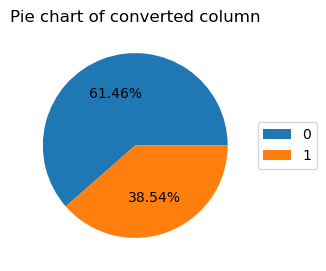

In [26]:
# plotting pie chart of value count
labels= leads.Converted.value_counts().index
value = leads.Converted.value_counts().values
plt.figure(figsize=(10,3))
plt.pie(value, autopct='%.2f%%')
plt.legend(labels,loc="center left",bbox_to_anchor=(1, 0.5, 0, 0))
plt.title('Pie chart of converted column')
plt.show()

  <b>Inference </b><br>
1. data is balanced<br>
2. We are having 61% leads who are not converted


### Data understanding and EDA

In [27]:
# getting the list of column having object data type
clm_object = list(i for i in leads.columns if leads[i].dtype==object)

# getting the list of column having numeric data type
clm_num = list(i for i in leads.columns if leads[i].dtype!=object)

print("column having object data type\n",clm_object, "\n")
print("column having numeric data type\n",clm_num)

column having object data type
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 

column having numeric data type
 ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [28]:
# defining a function to get pie chart and count plot for object datatype
def handling(clm):
    print("data type of column ({}) is \"{}\" \n".format(clm, leads[clm].dtype)) # getting data type
    print('Null value in column ({}) is \"{}\" \n'.format (clm, leads[clm].isnull().sum())) # getting null count
    print("............................................")
    print ("% value count of column " , leads[clm].value_counts(normalize=True)*100)    # getting value count
    print("............................................")

    labels= leads[clm].value_counts().index
    value = leads[clm].value_counts().values
    
   
    # plotting pie chart of value count
    plt.figure(figsize=(10,3))
    plt.pie(value, autopct='%.2f%%')
    plt.legend(labels,loc="center left",bbox_to_anchor=(1, 0.5, 0, 0))
    title="pie chart for" +" " + clm
    plt.title(title)
    plt.show()
    
    #plotting count plot with respect to Converted
    plt.figure(figsize=(10,3))
    sns.countplot(x=leads[clm], hue=leads.Converted)
    plt.xticks(rotation=90)
    title="count plot of" +" " + clm +" " + "with respect to Converted"
    plt.title(title)
    plt.show()

In [29]:
print(clm_object)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 1.  Handling    Lead Origin

data type of column (Lead Origin) is "object" 

Null value in column (Lead Origin) is "0" 

............................................
% value count of column  Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
............................................


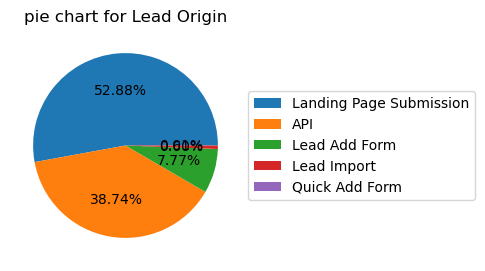

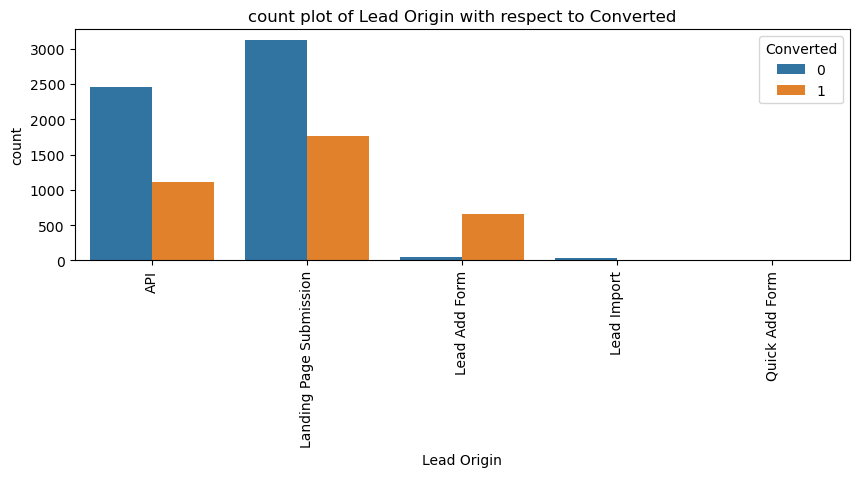

In [30]:
clm_object.pop(0)  # removing Lead origin from clm_object
handling('Lead Origin') # getting details of Lead Origin

<b>Inference </b><br>
1. data is balanced<br>
2. 'API' and 'Landing Page Submission' has higher number of leads as well as 'conversion'.<br>
3. 'Lead Add Form' has a very high conversion rate but count of leads are not very high.<br>
4. to increase  the conversion we have to increase the 'Lead Add Form' <br>

In [31]:
print(clm_object)

['Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 2.  Handling    Lead Source

data type of column (Lead Source) is "object" 

Null value in column (Lead Source) is "36" 

............................................
% value count of column  Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64
............................................


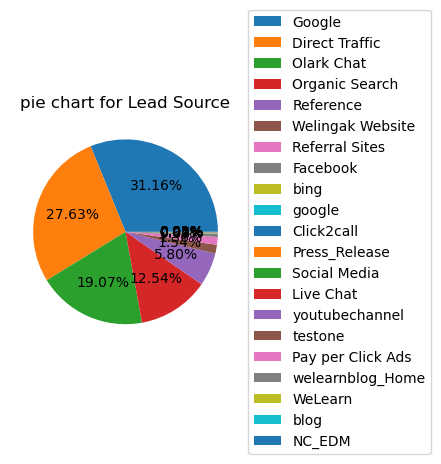

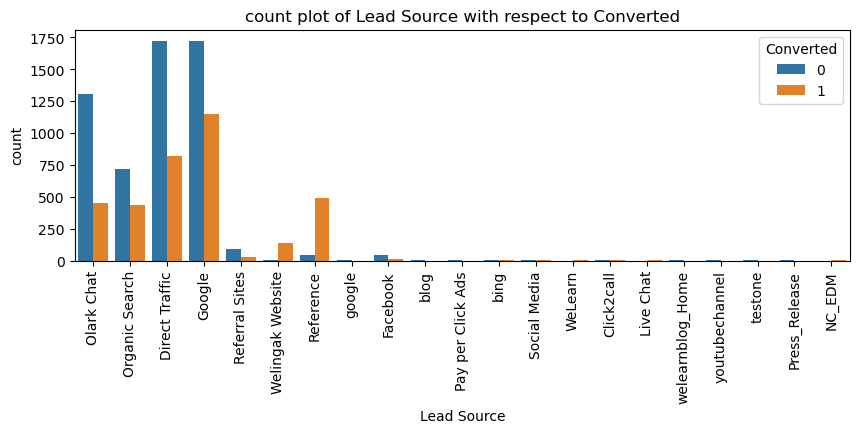

In [32]:
clm_object.pop(0) # removing Lead Source from clm_object
handling('Lead Source') # getting details of ead Source

In [33]:
# replacing  google with Google
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

In [34]:
# getting mode of the Lead Source column
leads['Lead Source'].mode()

0    Google
Name: Lead Source, dtype: object

In [35]:
# Replacing null value with mode of the Lead Source column
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')

In [36]:
# getting null value of lead source 
leads['Lead Source'].isnull().sum()

0

In [37]:
leads['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [38]:
# replacing  the value count which are less than 50 to 'Other' i.e. ['bing','Click2call' ,'Social Media','Live Chat','Press_Release', 'Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel','testone' , 'NC_EDM']
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Social Media',
                                                     'Live Chat','Press_Release',
                                                     'Pay per Click Ads','blog','WeLearn',
                                                     'welearnblog_Home','youtubechannel','testone' , 'NC_EDM'], 'Other')

data type of column (Lead Source) is "object" 

Null value in column (Lead Source) is "0" 

............................................
% value count of column  Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Other                0.248918
Name: Lead Source, dtype: float64
............................................


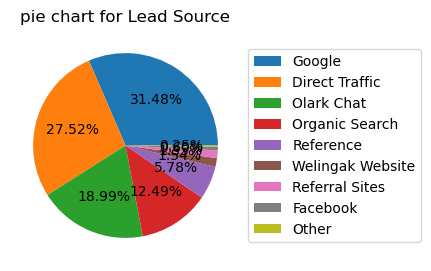

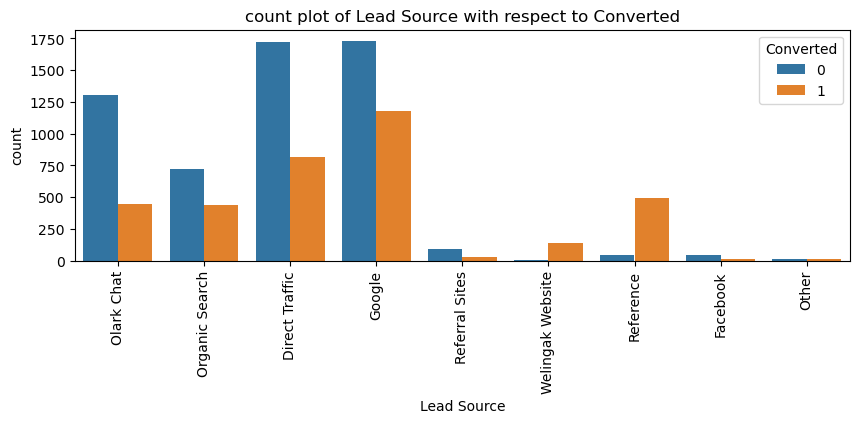

In [39]:
handling('Lead Source')

<b>Inference </b><br>
1. data is balanced<br>
2. 'Olark Chat', 'Organic Search', 'Google', 'Direct Traffic' has higher number of leads as well as 'conversion'.<br>
3. 'Reference' has a very high conversion rate.<br>
4. to increase the conversion, we have to increase the 'Reference' <br>

In [40]:
print(clm_object)

['Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 3. Handling 'Do Not Email'

data type of column (Do Not Email) is "object" 

Null value in column (Do Not Email) is "0" 

............................................
% value count of column  No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
............................................


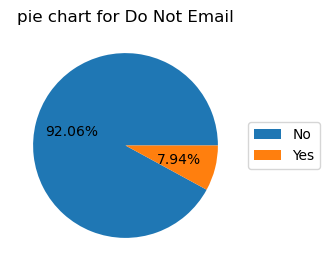

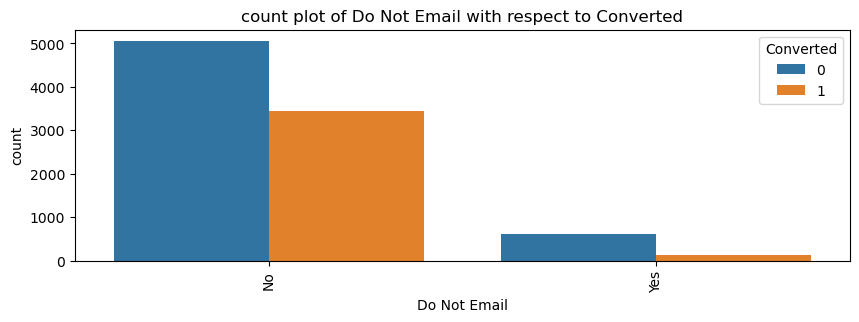

In [41]:
clm_object.pop(0)  # removing 'Do Not Email' from clm_object
handling('Do Not Email') # getting details of 'Do Not Email'

<b>Inference </b><br>
1. Data us biased here,  however we can delete column which are having more than 95% biased data<br>
2. who opted 'no' to the 'do not email' had more number of leads<br>

In [42]:
print(clm_object)

['Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 4. Handling Do Not Call

data type of column (Do Not Call) is "object" 

Null value in column (Do Not Call) is "0" 

............................................
% value count of column  No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64
............................................


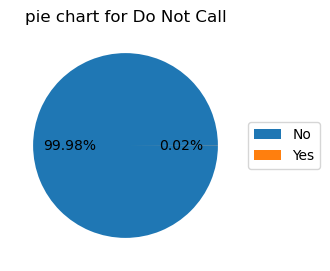

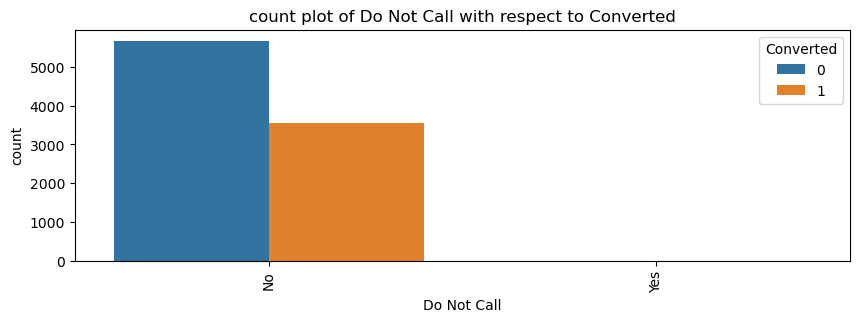

In [43]:
clm_object.pop(0)  # removing 'Do Not Call' from clm_object
handling('Do Not Call') # getting details of 'Do Not Call'

In [44]:
# Data is biased here i.e 99% so we can delete this columnn
leads.drop('Do Not Call', axis=1, inplace=True)

In [45]:
#checking rows and columns of the data
leads.shape

(9240, 24)

In [46]:
print(clm_object)

['Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 5. Handling 'Last Activity'

data type of column (Last Activity) is "object" 

Null value in column (Last Activity) is "103" 

............................................
% value count of column  Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64
............................................


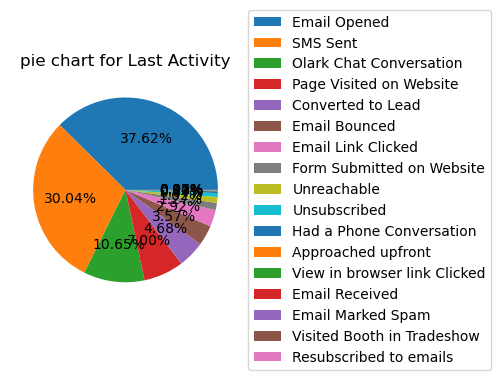

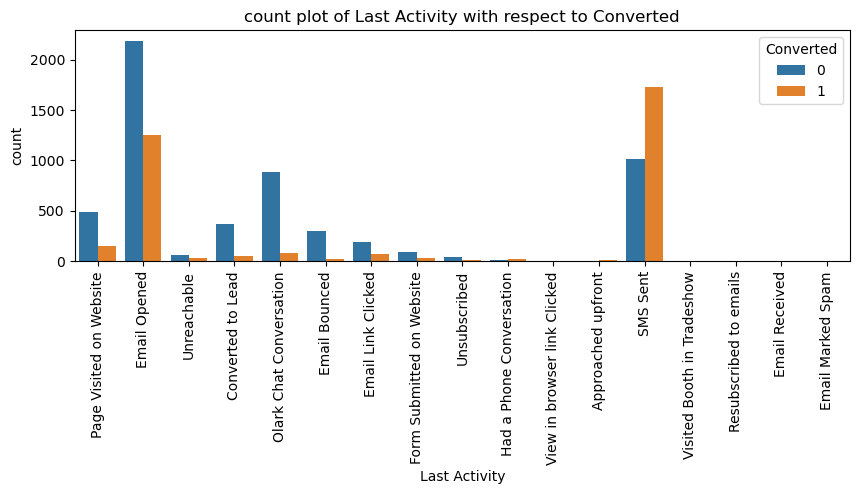

In [47]:
clm_object.pop(0)  # removing 'Last Activity' from clm_object
handling('Last Activity') # getting details of 'Last Activity'

In [48]:
# mode of the column
leads['Last Activity'].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [49]:
# Replacing null value with mode 
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Email Opened')

# checking null value
leads['Last Activity'].isnull().sum()

0

In [50]:
# geting value count
leads['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [51]:
# replacing  the value count which are less than 50 to 'Other' i.e. 
#["Had a Phone Conversation ","Approached upfront", 'View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails']
leads['Last Activity'] = leads['Last Activity'].replace(["Had a Phone Conversation", "Approached upfront",
                                                         'View in browser link Clicked','Email Received',
                                                         'Email Marked Spam','Visited Booth in Tradeshow',
                                                         'Resubscribed to emails'], 'Other')

data type of column (Last Activity) is "object" 

Null value in column (Last Activity) is "0" 

............................................
% value count of column  Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Unreachable                   1.006494
Unsubscribed                  0.660173
Other                         0.551948
Name: Last Activity, dtype: float64
............................................


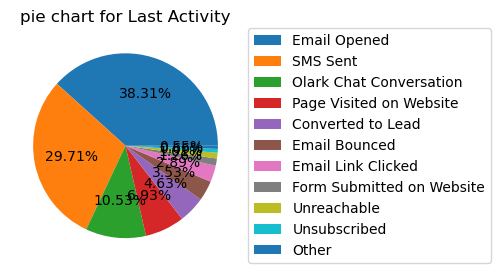

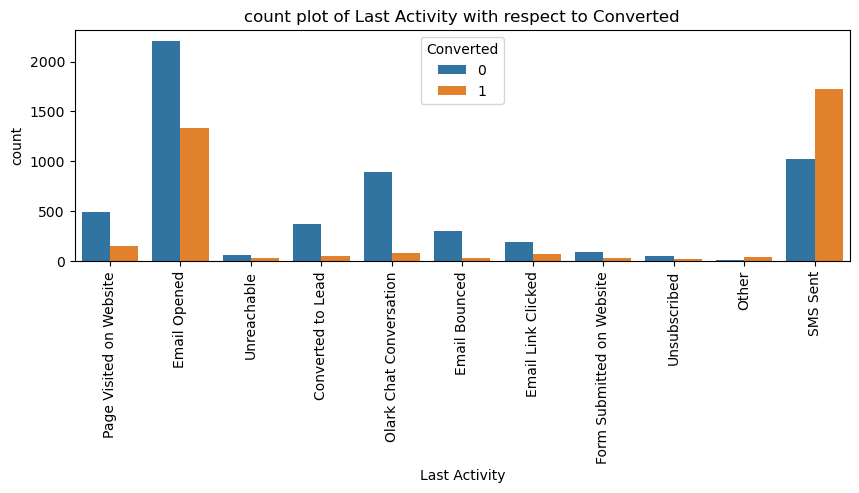

In [52]:
handling('Last Activity')

<b>Inference </b><br>
1. Data is not biased
2. "email opened" and "SMS sent" has more number of leads <br>
3. "SMS sent" has high rate of lead conversion

In [53]:
print(clm_object)

['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 6. Handling Country

data type of column (Country) is "object" 

Null value in column (Country) is "2461" 

............................................
% value count of column  India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.

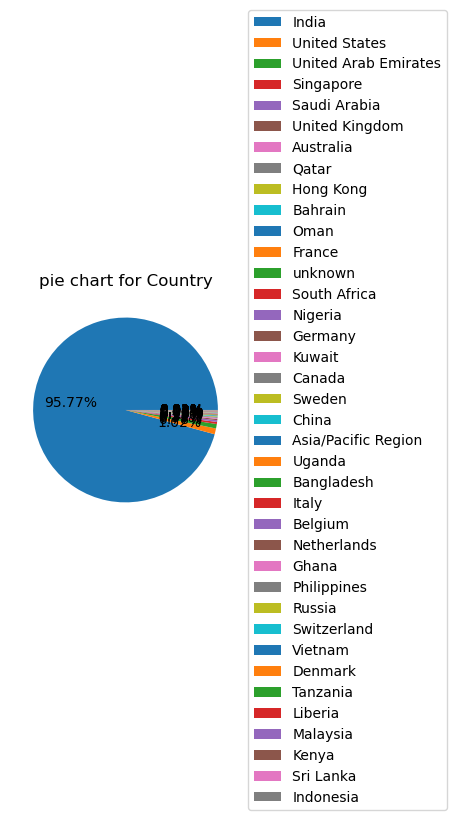

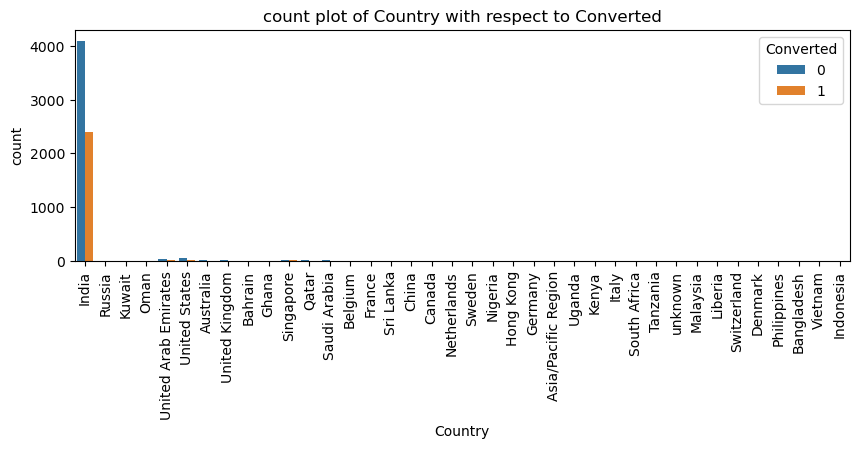

In [54]:
clm_object.pop(0)  # removing 'Country' from clm_object
handling('Country') # getting details of 'Country'

In [55]:
# here more than 95% data is belong to India hence data is biased 
# WE can delete the column country
leads.drop('Country', axis=1, inplace=True)

#checking rows and columns of the data
leads.shape

(9240, 23)

In [56]:
print(clm_object)

['Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 7. Handling Specialization

data type of column (Specialization) is "object" 

Null value in column (Specialization) is "1438" 

............................................
% value count of column  Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                    

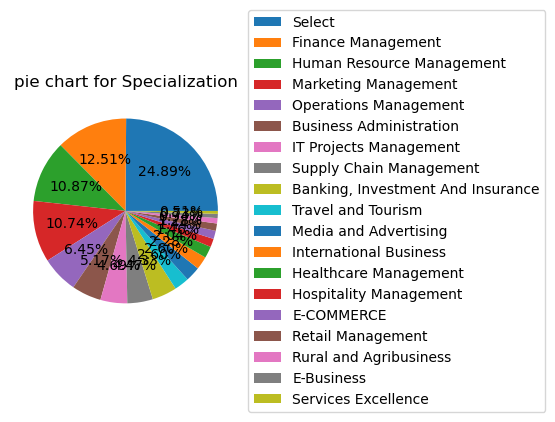

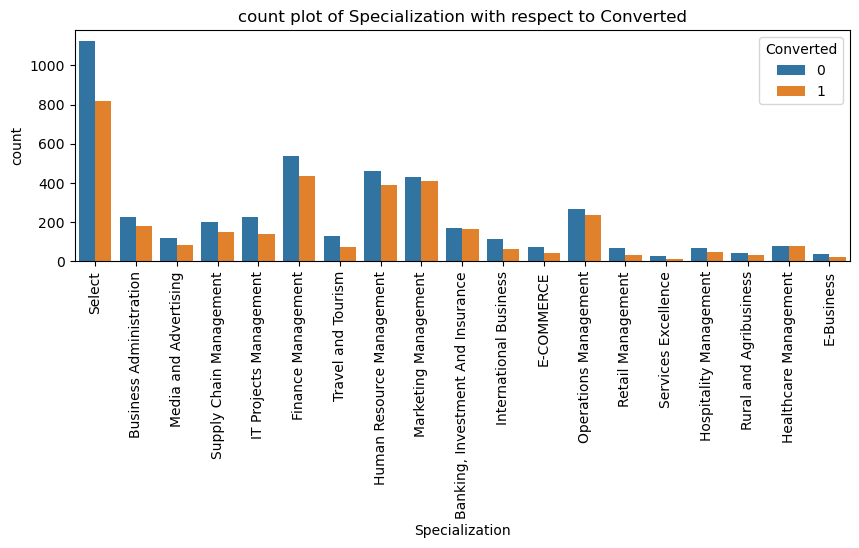

In [57]:
clm_object.pop(0)  # removing 'Specialization' from clm_object
handling('Specialization') # getting details of 'Specialization'

In [58]:
# Replacing select value and null value with 'Not Specified' 
# as the leads have not selected the Specialization or does not specify the Specialization
leads['Specialization'] = leads['Specialization'].replace('Select', 'Not Specified')
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [59]:
# we can see that lot of Specialization that is from management so we can combined all the management in one
Management = list(i for i in leads.Specialization.value_counts().index if i.split()[-1]=="Management" )
print(Management)

['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'IT Projects Management', 'Supply Chain Management', 'Healthcare Management', 'Hospitality Management', 'Retail Management']


In [60]:
# Replacing management specializations with management 
leads['Specialization'] = leads['Specialization'].replace(Management, 'Management')

In [61]:
# getting value count
leads['Specialization'].value_counts()


Management                           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

data type of column (Specialization) is "object" 

Null value in column (Specialization) is "0" 

............................................
% value count of column  Management                           46.028139
Not Specified                        36.580087
Business Administration               4.361472
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
E-COMMERCE                            1.212121
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64
............................................


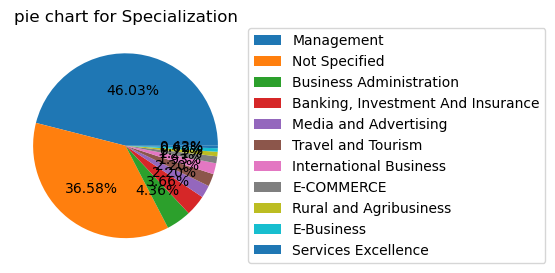

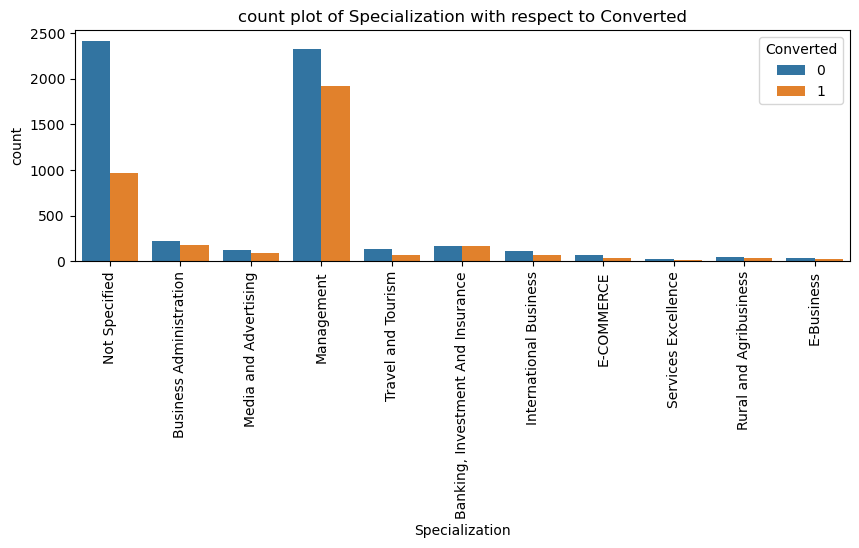

In [62]:
handling('Specialization') 

<b>Inference </b><br>
1.	Management specialization have higher number of leads and conversion rate<br>
2.	Banking, Investment and Insurance has almost 100% conversion so we can focus more on management and Banking, Investment and Insurance

In [63]:
print(clm_object)

['How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 8. Handling 'How did you hear about X Education'

data type of column (How did you hear about X Education) is "object" 

Null value in column (How did you hear about X Education) is "2207" 

............................................
% value count of column  Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64
............................................


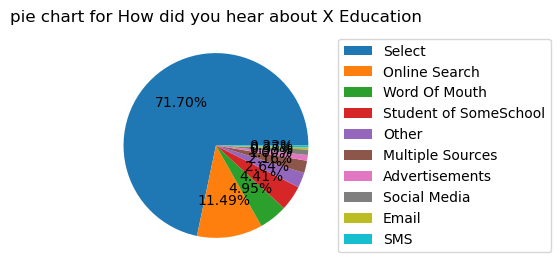

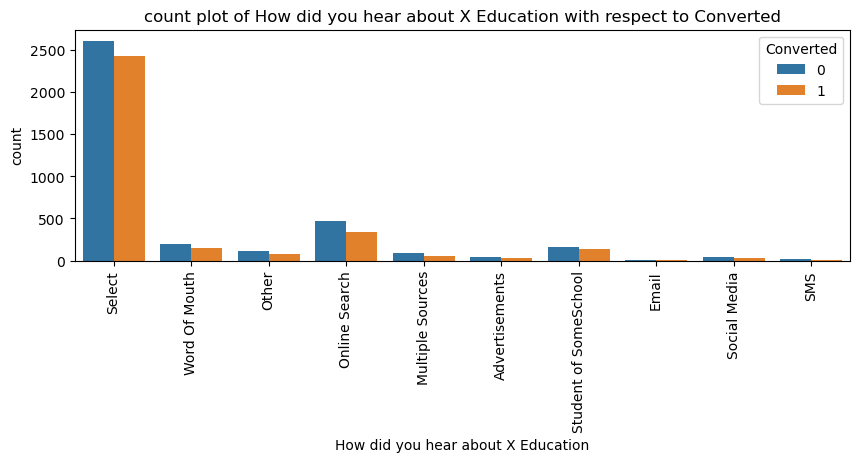

In [64]:
clm_object.pop(0)  # removing 'How did you hear about X Education' from clm_object
handling('How did you hear about X Education') # getting details of 'How did you hear about X Education'


In [65]:
# replacing select with null value and calculating % of null value
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select', np.nan)

#calculation % of null value
leads['How did you hear about X Education'].isnull().sum()/len(leads)*100

78.46320346320347

In [66]:
# null value percentage is more than 40 % so we can delet column "How did you hear about X Education"
leads.drop("How did you hear about X Education", axis=1, inplace=True)

#checking rows and columns of the data
leads.shape

(9240, 22)

In [67]:
print(clm_object)

['What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 9. Handling 'What is your current occupation'

data type of column (What is your current occupation) is "object" 

Null value in column (What is your current occupation) is "2690" 

............................................
% value count of column  Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64
............................................


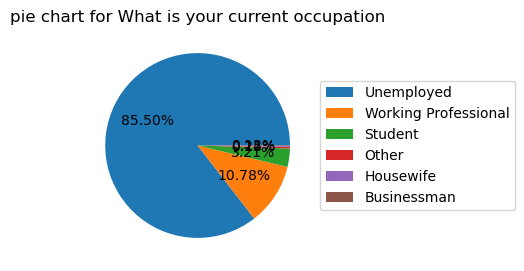

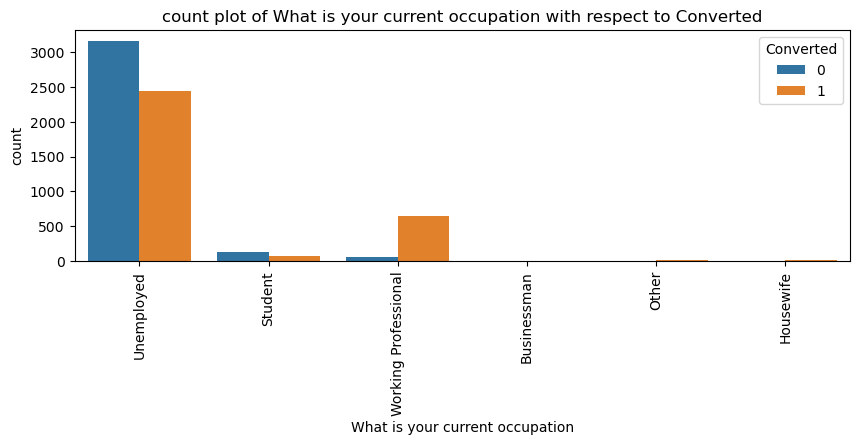

In [68]:
clm_object.pop(0)  # removing 'What is your current occupation' from clm_object
handling('What is your current occupation') # getting details of 'What is your current occupation'

In [69]:
# mode of the column
leads['What is your current occupation'].mode()

0    Unemployed
Name: What is your current occupation, dtype: object

In [70]:
# Replacing null value with mode 
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

data type of column (What is your current occupation) is "object" 

Null value in column (What is your current occupation) is "0" 

............................................
% value count of column  Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64
............................................


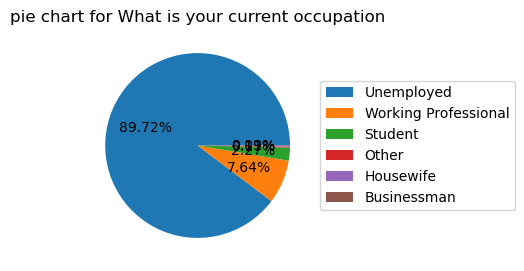

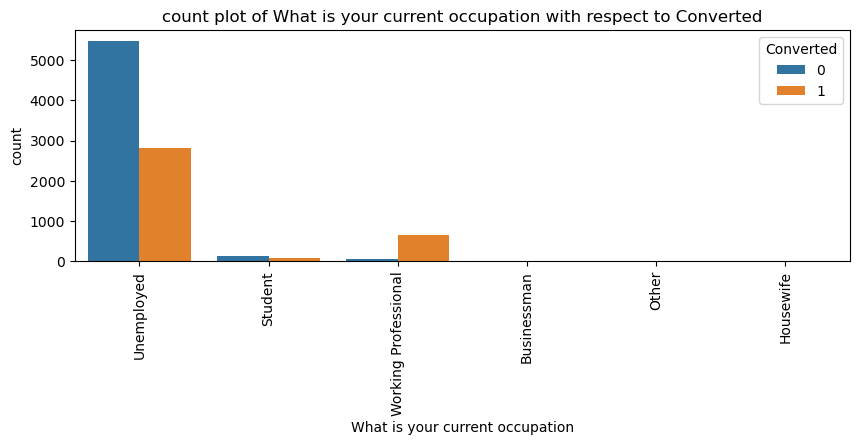

In [71]:
handling('What is your current occupation')

<b>Inference </b><br>
1. unemployed has higher number of leads with approximate 50% conversion ratio <br>
2. Working Professionals have high chances of conversion<br>


In [72]:
print(clm_object)

['What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 10. Handling 'What matters most to you in choosing a course'

data type of column (What matters most to you in choosing a course) is "object" 

Null value in column (What matters most to you in choosing a course) is "2709" 

............................................
% value count of column  Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64
............................................


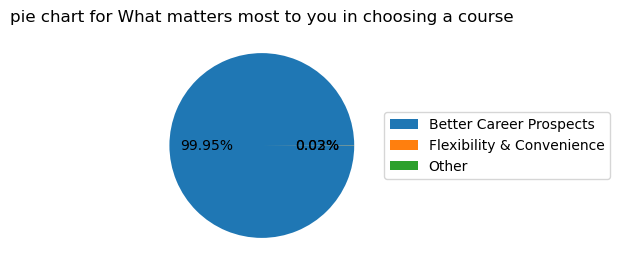

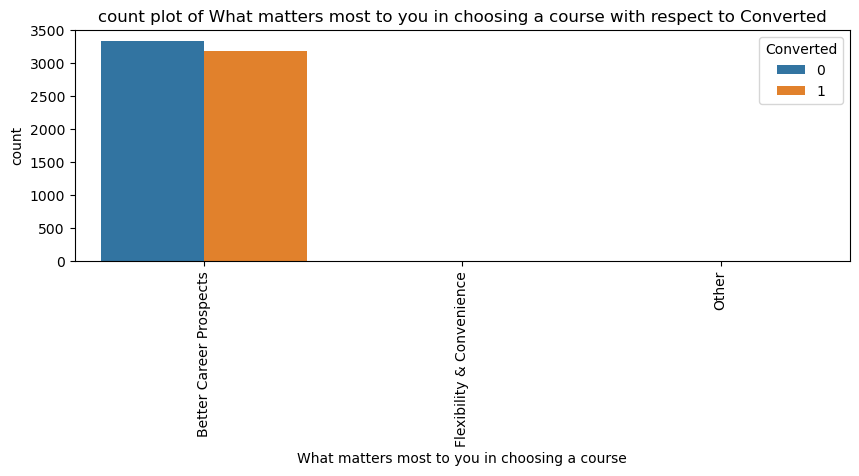

In [73]:
clm_object.pop(0)  # removing 'What matters most to you in choosing a course' from clm_object
handling('What matters most to you in choosing a course') # getting details of 'What matters most to you in choosing a course'

In [74]:
# here more than 95% data is belong to 'Better Career Prospects' hence data is biased 
# WE can delete the column 'What matters most to you in choosing a course'
leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)

#checking rows and columns of the data
leads.shape

(9240, 21)

In [75]:
print(clm_object)

['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 11. Handling 'Search'

data type of column (Search) is "object" 

Null value in column (Search) is "0" 

............................................
% value count of column  No     99.848485
Yes     0.151515
Name: Search, dtype: float64
............................................


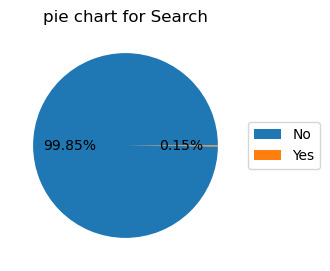

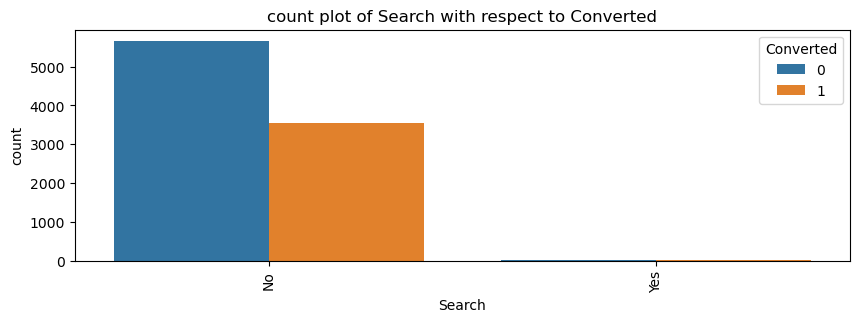

In [76]:
clm_object.pop(0)  # removing 'Search' from clm_object
handling('Search') # getting details of 'Search'

In [77]:
# here more than 95% data is belong to 'No' hence data is biased 
# WE can delete the column 'Search'
leads.drop('Search', axis=1, inplace=True)

#checking rows and columns of the data
leads.shape

(9240, 20)

In [78]:
print(clm_object)

['Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 12. Handling 'Newspaper Article'

data type of column (Newspaper Article) is "object" 

Null value in column (Newspaper Article) is "0" 

............................................
% value count of column  No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64
............................................


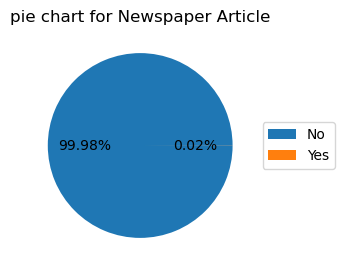

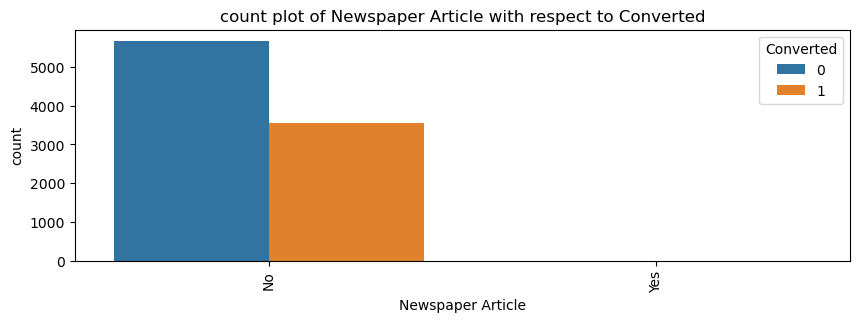

In [79]:
clm_object.pop(0)  # removing 'Newspaper Article' from clm_object
handling('Newspaper Article') # getting details of 'Newspaper Article'

In [80]:
# here more than 95% data is belong to 'No' hence data is biased 
# WE can delete the column 'Newspaper Article'
leads.drop('Newspaper Article', axis=1, inplace=True)

#checking rows and columns of the data
leads.shape

(9240, 19)

In [81]:
print(clm_object)

['X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 13. Handling 'X Education Forums'

data type of column (X Education Forums) is "object" 

Null value in column (X Education Forums) is "0" 

............................................
% value count of column  No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64
............................................


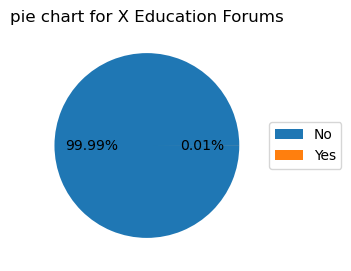

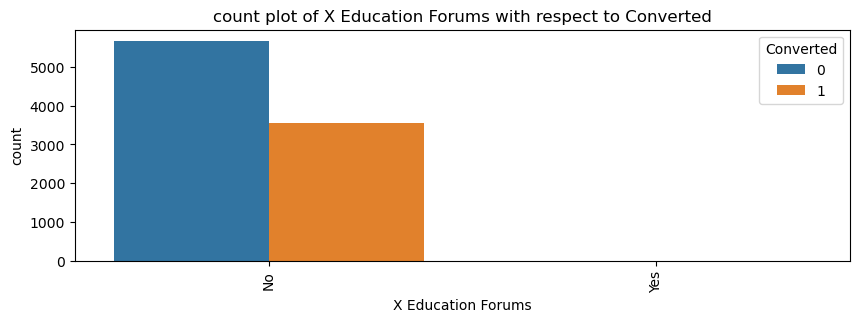

In [82]:
clm_object.pop(0)  # removing 'X Education Forums' from clm_object
handling('X Education Forums') # getting details of 'X Education Forums'


In [83]:
# here more than 95% data is belong to 'No' hence data is biased 
# WE can delete the column 'X Education Forums'
leads.drop('X Education Forums', axis=1, inplace=True)

#checking rows and columns of the data
leads.shape

(9240, 18)

In [84]:
print(clm_object)

['Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 14. Handling 'Newspaper'

data type of column (Newspaper) is "object" 

Null value in column (Newspaper) is "0" 

............................................
% value count of column  No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64
............................................


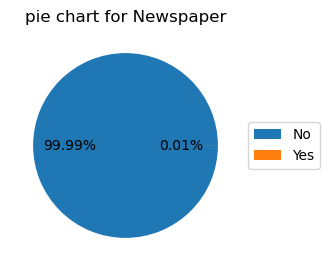

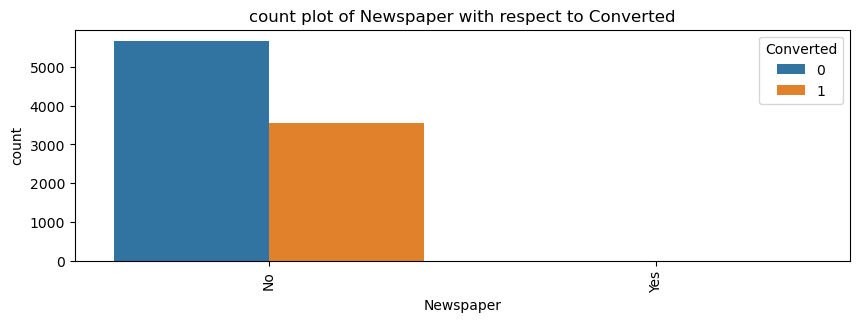

In [85]:
clm_object.pop(0)  # removing 'Newspaper' from clm_object
handling('Newspaper') # getting details of 'Newspaper'

In [86]:
# here more than 95% data is belong to 'No' hence data is biased 
# WE can delete the column 'Newspaper '
leads.drop('Newspaper', axis=1, inplace=True)

#checking rows and columns of the data
leads.shape

(9240, 17)

In [87]:
print(clm_object)

['Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 15. Handling 'Digital Advertisement'

data type of column (Digital Advertisement) is "object" 

Null value in column (Digital Advertisement) is "0" 

............................................
% value count of column  No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64
............................................


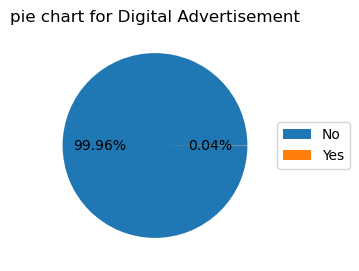

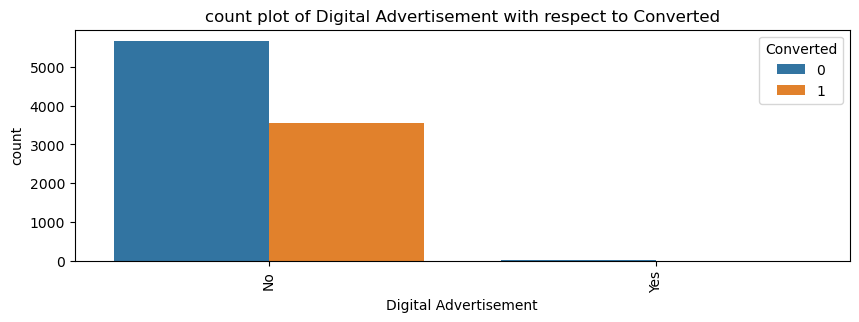

In [88]:
clm_object.pop(0)  # removing 'Digital Advertisement' from clm_object
handling('Digital Advertisement') # getting details of 'Digital Advertisement'

In [89]:
# here more than 95% data is belong to 'No' hence data is biased 
# WE can delete the column 'Digital Advertisement '
leads.drop('Digital Advertisement', axis=1, inplace=True)

#checking rows and columns of the data
leads.shape

(9240, 16)

In [90]:
print(clm_object)

['Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 16. Handling 'Through Recommendations'

data type of column (Through Recommendations) is "object" 

Null value in column (Through Recommendations) is "0" 

............................................
% value count of column  No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64
............................................


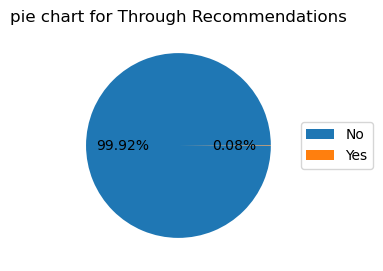

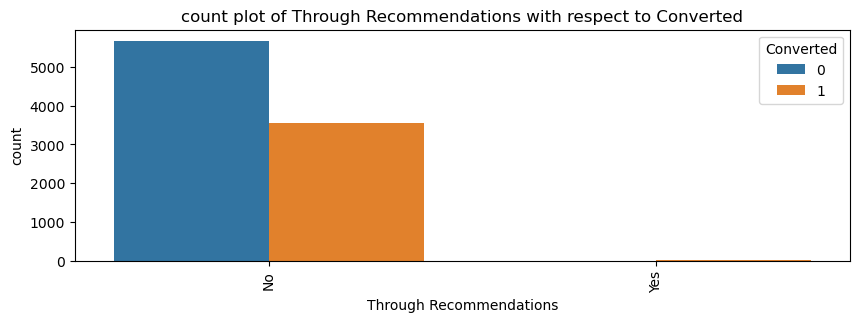

In [91]:
clm_object.pop(0)  # removing 'Through Recommendations' from clm_object
handling('Through Recommendations') # getting details of 'Through Recommendations'

In [92]:
# here more than 95% data is belong to 'No' hence data is biased 
# WE can delete the column 'Through Recommendations'
leads.drop('Through Recommendations', axis=1, inplace=True)

#checking rows and columns of the data
leads.shape

(9240, 15)

In [93]:
print(clm_object)

['Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 17. Handling 'Tags'

data type of column (Tags) is "object" 

Null value in column (Tags) is "3353" 

............................................
% value count of column  Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given            

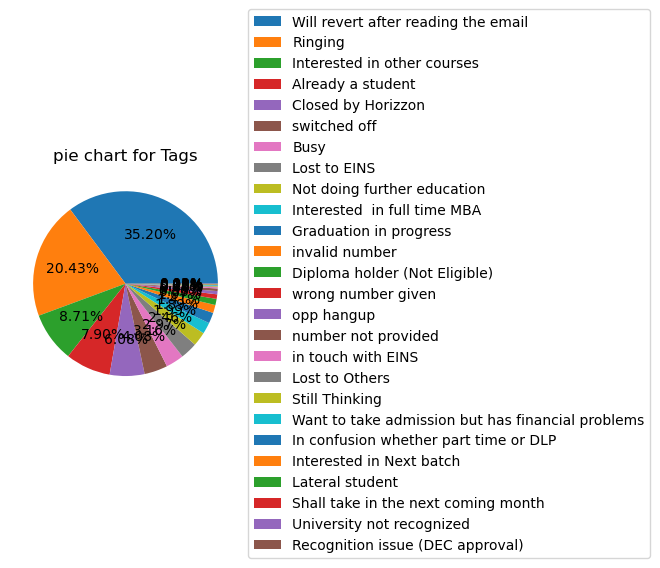

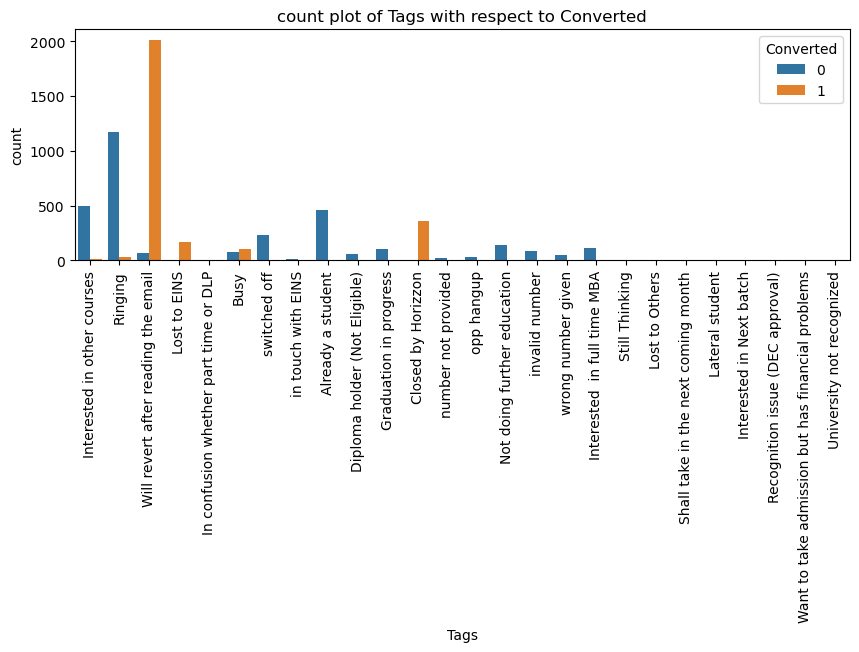

In [94]:
clm_object.pop(0)  # removing 'Tags' from clm_object
handling('Tags') # getting details of 'Tags'

In [95]:
# We can replace the null value to 'Not Specified' as the leads has not specified this field or leave this field blank
leads['Tags'] = leads['Tags'].replace(np.nan, 'Not Specified')

# checking null value
leads['Tags'].isnull().sum()

0

In [96]:
# getting value count
leads['Tags'].value_counts()


Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [97]:
# as there are lots of value, we can merge count of value less than 100 to "Other"
leads['Tags'] = leads['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given',
                                       'opp hangup','number not provided','in touch with EINS',
                                       'Lost to Others','Still Thinking','Want to take admission but has financial problems',
                                       'In confusion whether part time or DLP','Interested in Next batch',
                                       'Lateral student','Shall take in the next coming month',
                                       'University not recognized','Recognition issue (DEC approval)'], 'Other')

data type of column (Tags) is "object" 

Null value in column (Tags) is "0" 

............................................
% value count of column  Not Specified                          36.287879
Will revert after reading the email    22.424242
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Closed by Horizzon                      3.874459
Other                                   3.268398
switched off                            2.597403
Busy                                    2.012987
Lost to EINS                            1.893939
Not doing further education             1.569264
Interested  in full time MBA            1.266234
Graduation in progress                  1.201299
Name: Tags, dtype: float64
............................................


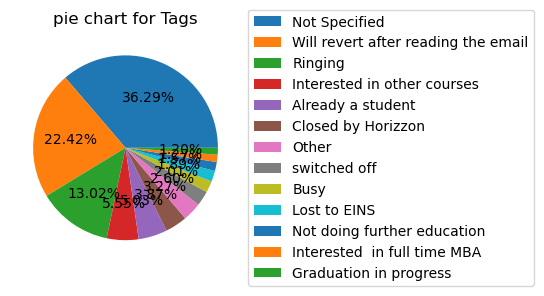

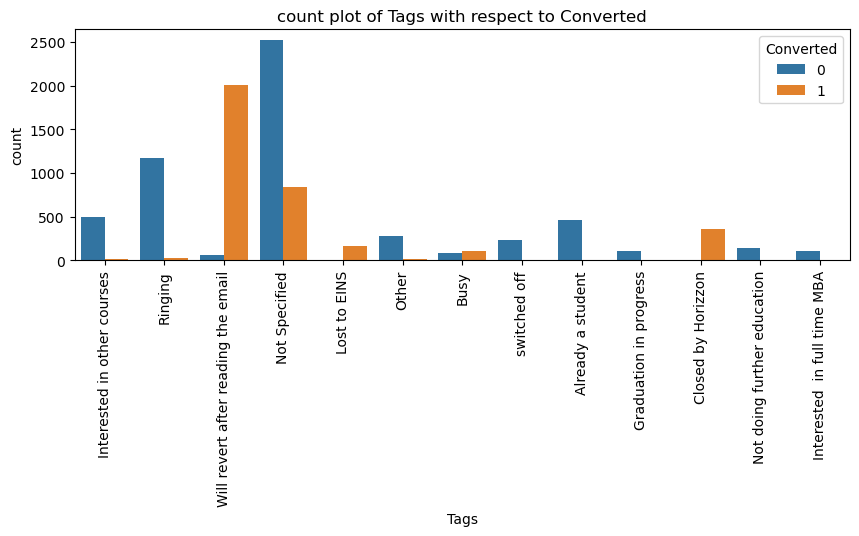

In [98]:
handling('Tags')


<b>Inference </b><br>
1.	'Will revert after reading the email' will generate more number of leads and height conversion <br>
2.	"Closed by Horizzon" has higher conversion rate <br>

In [99]:
print(clm_object)

['Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 18. Handling 'Lead Profile'

data type of column (Lead Profile) is "object" 

Null value in column (Lead Profile) is "2709" 

............................................
% value count of column  Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64
............................................


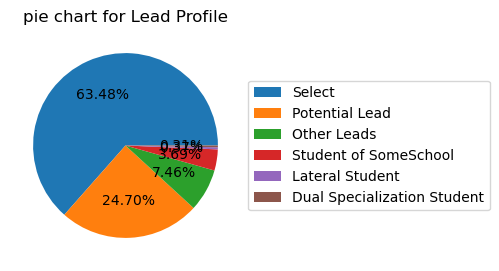

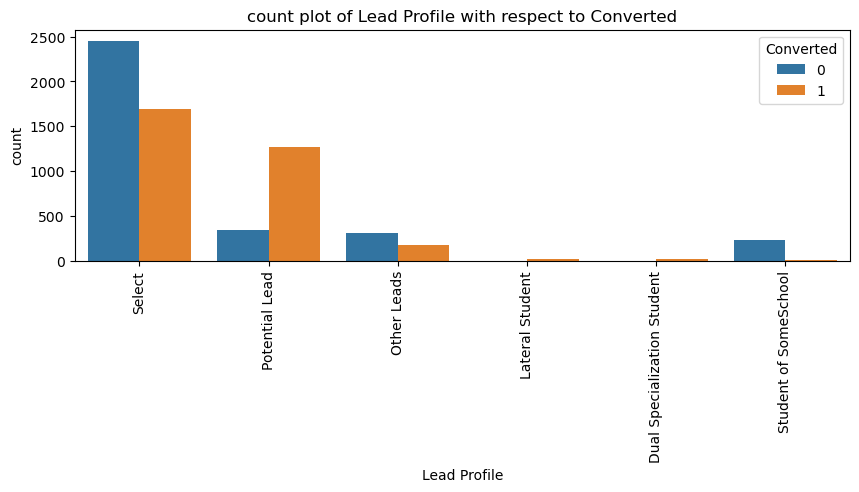

In [100]:
clm_object.pop(0)  # removing 'Lead Profile' from clm_object
handling('Lead Profile') # getting details of 'Lead Profile'

In [101]:
# Lead Profile   ===  A lead level assigned to each customer based on their profile.
# it is assigned by the company and we can replace select to null value as those profile was not analysed. 

leads['Lead Profile'] = leads['Lead Profile'].replace('Select', np.nan,)

# calculating null % of null value
leads['Lead Profile'].isnull().sum()/len(leads)*100

74.18831168831169

In [102]:
# here % of null value is more than 40%
# we can delete column 'Lead Profile'
leads.drop('Lead Profile', axis=1, inplace=True)

#checking rows and columns of the data
leads.shape

(9240, 14)

In [103]:
print(clm_object)

['City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### 19. Handling 'City'

data type of column (City) is "object" 

Null value in column (City) is "1420" 

............................................
% value count of column  Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64
............................................


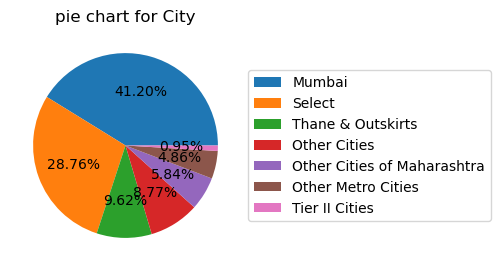

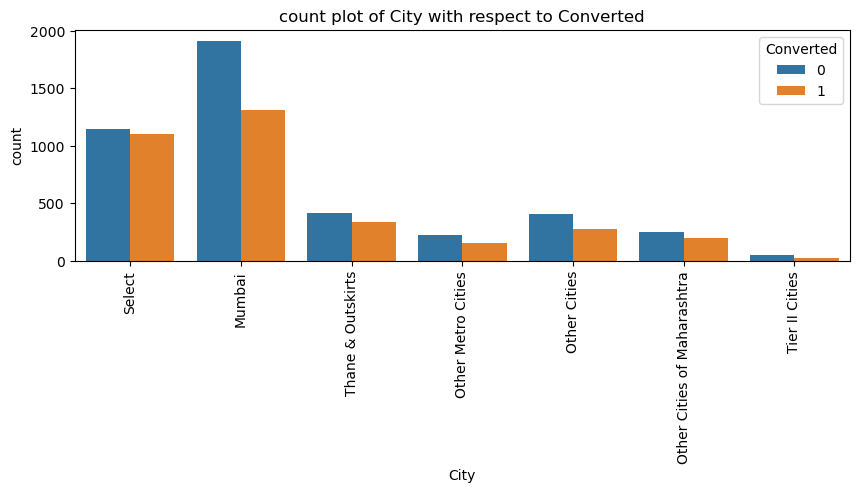

In [104]:
clm_object.pop(0)  # removing 'City' from clm_object
handling('City') # getting details of 'City'

In [105]:
# We can replace the 'Select' to null value
leads['City'] = leads['City'].replace('Select',np.nan)

# calculating null % of null value
leads['City'].isnull().sum()/len(leads)*100

39.70779220779221

In [106]:
# Missing value is less than 40% hence we retain this field
# mode of the column
leads['City'].mode()

0    Mumbai
Name: City, dtype: object

In [107]:
# Replacing null value with mode 
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

data type of column (City) is "object" 

Null value in column (City) is "0" 

............................................
% value count of column  Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64
............................................


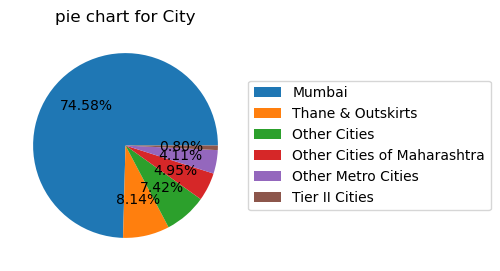

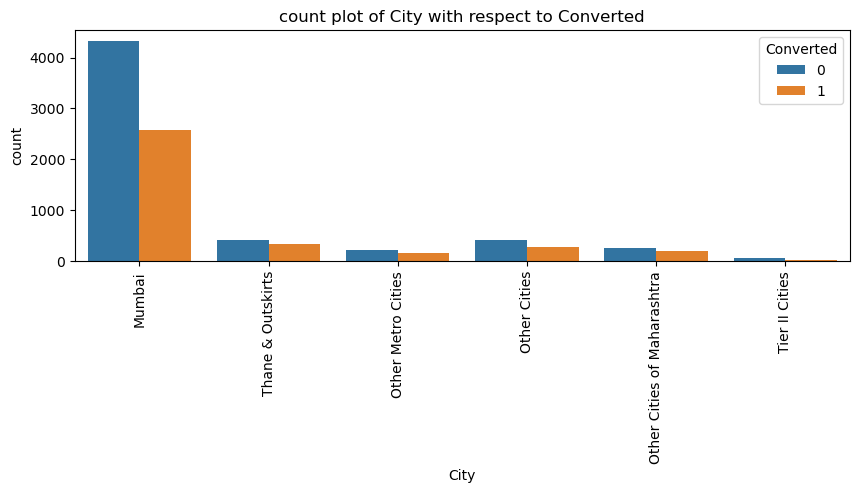

In [108]:
handling('City')

<b>Inference </b><br>
1. Higher  number of leads are generated from Mumbai<br>
2. conversion rate is almost same in all the city<br>

In [109]:
print(clm_object)

['A free copy of Mastering The Interview', 'Last Notable Activity']


#### 20. Handling 'A free copy of Mastering The Interview'

data type of column (A free copy of Mastering The Interview) is "object" 

Null value in column (A free copy of Mastering The Interview) is "0" 

............................................
% value count of column  No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64
............................................


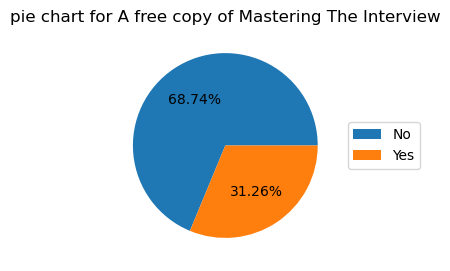

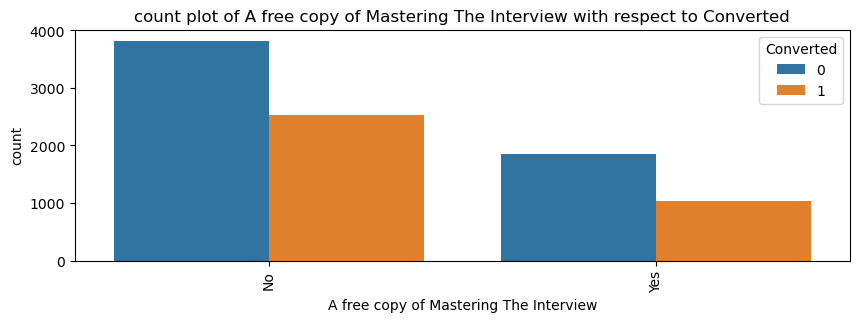

In [110]:
clm_object.pop(0)  # removing 'A free copy of Mastering The Interview' from clm_object
handling('A free copy of Mastering The Interview') # getting details of 'A free copy of Mastering The Interview'

<b>Inference </b><br>
1. Higher number of leads are generated who answered 'no' to 'A free copy of Mastering The Interview'<br>
2. conversion rate is almost similar <br>

In [111]:
print(clm_object)

['Last Notable Activity']


#### 21. Handling 'Last Notable Activity'

data type of column (Last Notable Activity) is "object" 

Null value in column (Last Notable Activity) is "0" 

............................................
% value count of column  Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64
............................................


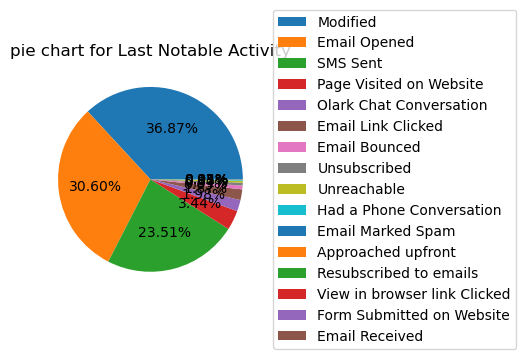

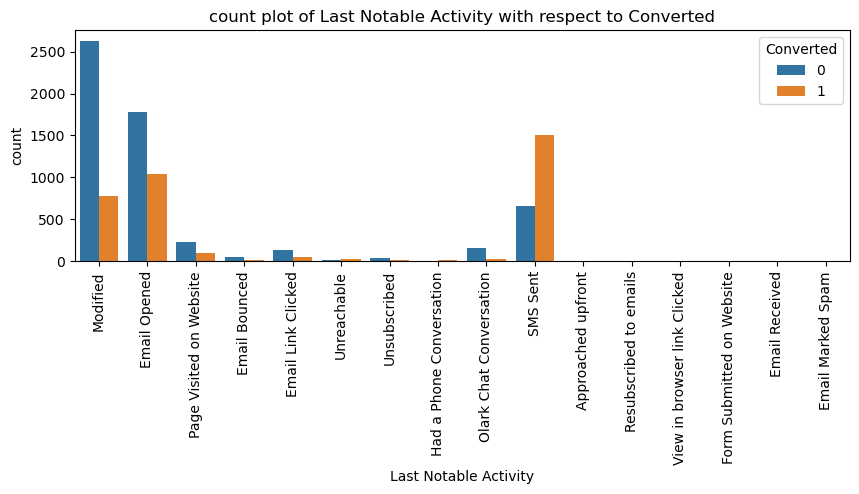

In [112]:
clm_object.pop(0)  # removing 'Last Notable Activity' from clm_object
handling('Last Notable Activity') # getting details of 'Last Notable Activity'


In [113]:
# merge the value which are having %count less than 1% to Other

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed',
                                                                         'Unreachable','Had a Phone Conversation',
                                                                         'Email Marked Spam','Approached upfront',
                                                                         'Resubscribed to emails','View in browser link Clicked',
                                                                         'Form Submitted on Website','Email Received'],"Other")


data type of column (Last Notable Activity) is "object" 

Null value in column (Last Notable Activity) is "0" 

............................................
% value count of column  Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Page Visited on Website     3.441558
Olark Chat Conversation     1.980519
Email Link Clicked          1.872294
Other                       1.731602
Name: Last Notable Activity, dtype: float64
............................................


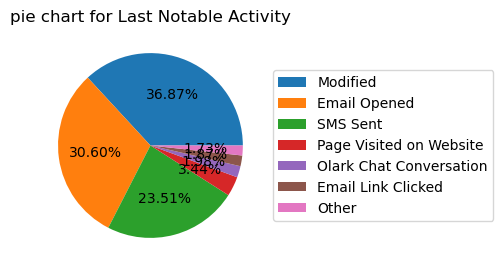

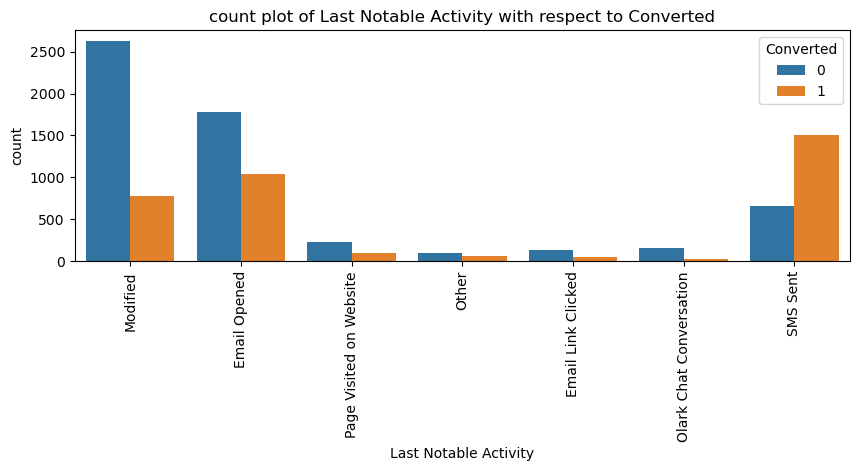

In [114]:
handling('Last Notable Activity')

<b>Inference </b><br>
1. 'Modified', 'Email Opened ','SMS Sent' generate higher number of leads 
2. SMS sent are having higher conversion rates <br>

---

In [115]:
# shape of the table
leads.shape

(9240, 14)

In [116]:
#Printing head of the table
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
Lead Number                                                                    
660737                           API      Olark Chat           No          0   
660728                           API  Organic Search           No          0   
660727       Landing Page Submission  Direct Traffic           No          1   
660719       Landing Page Submission  Direct Traffic           No          0   
660681       Landing Page Submission          Google           No          1   

             TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                                   
660737               0.0                            0                   0.0   
660728               5.0                          674                   2.5   
660727               2.0                         1532                   2.0   
660719               1.0                          305                   1.0   
660681               2.0                         1428                   1.0   

                       Last Activity           Specialization  \
Lead Number                                                     
660737       Page Visited on Website            Not Specified   
660728                  Email Opened            Not Specified   
660727                  Email Opened  Business Administration   
660719                   Unreachable    Media and Advertising   
660681             Converted to Lead            Not Specified   

            What is your current occupation  \
Lead Number                                   
660737                           Unemployed   
660728                           Unemployed   
660727                              Student   
660719                           Unemployed   
660681                           Unemployed   

                                            Tags    City  \
Lead Number                                                
660737               Interested in other courses  Mumbai   
660728                                   Ringing  Mumbai   
660727       Will revert after reading the email  Mumbai   
660719                                   Ringing  Mumbai   
660681       Will revert after reading the email  Mumbai   

            A free copy of Mastering The Interview Last Notable Activity  
Lead Number                                                               
660737                                          No              Modified  
660728                                          No          Email Opened  
660727                                         Yes          Email Opened  
660719                                          No              Modified  
660681                                          No              Modified

In [117]:
# numeric Column in the data
print(clm_num)

['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


#### 22. Handling "Converted"

In [118]:
# getting null value
leads.Converted.isnull().sum()

0

In [119]:
# Value count for column Converted
leads.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

#### 23. Handling "TotalVisits"

In [120]:
# getting null value
leads['TotalVisits'].isnull().sum()

137

In [121]:
#describing the column
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [122]:
# imputing the null value with the median i.e. 50 percentile which is  3

leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan , 3)

# getting null value
leads['TotalVisits'].isnull().sum()

0

In [123]:
#describing the column
leads['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

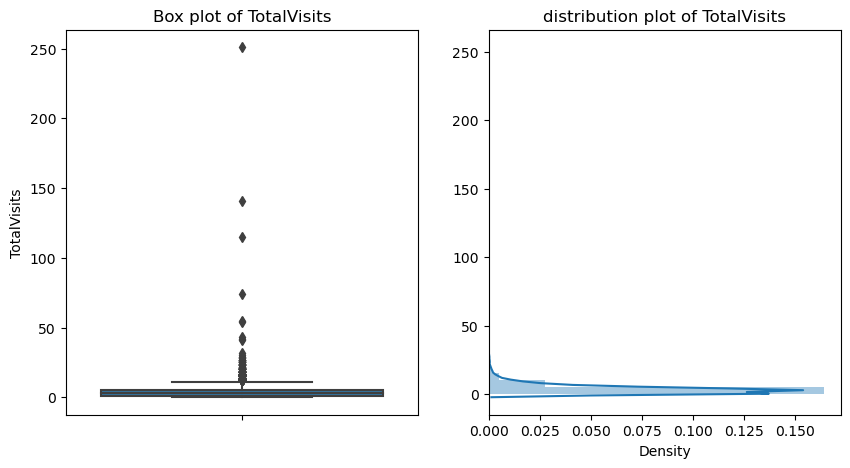

In [124]:
# plotting the box plot and distribution plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=leads['TotalVisits'])
plt.title("Box plot of TotalVisits")
plt.subplot(1,2,2)
sns.distplot(x=leads['TotalVisits'], vertical=True)
plt.title("distribution plot of TotalVisits")
plt.show()

In [125]:
# finding IQR
Q3=leads['TotalVisits'].quantile(0.75)
Q1= leads['TotalVisits'].quantile(0.25)
IQR=Q3-Q1
print('Q3 =', Q3 )
print('Q1 =', Q1 )
print('IQR =', IQR )

Q3 = 5.0
Q1 = 1.0
IQR = 4.0


In [126]:
#finding threshold value of the data
threshold = Q3+1.5*IQR
threshold

11.0

In [127]:
# Finding number of Outliers observation
leads[leads['TotalVisits']>threshold].shape

(267, 14)

In [128]:
# here we can impute 267 outliers with threshold value of the data i.e. 11
# df.loc[row, column]
leads.loc[leads['TotalVisits']>11, 'TotalVisits']=11

In [129]:
#describing the column
leads['TotalVisits'].describe()

count    9240.000000
mean        3.217424
std         2.860471
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: TotalVisits, dtype: float64

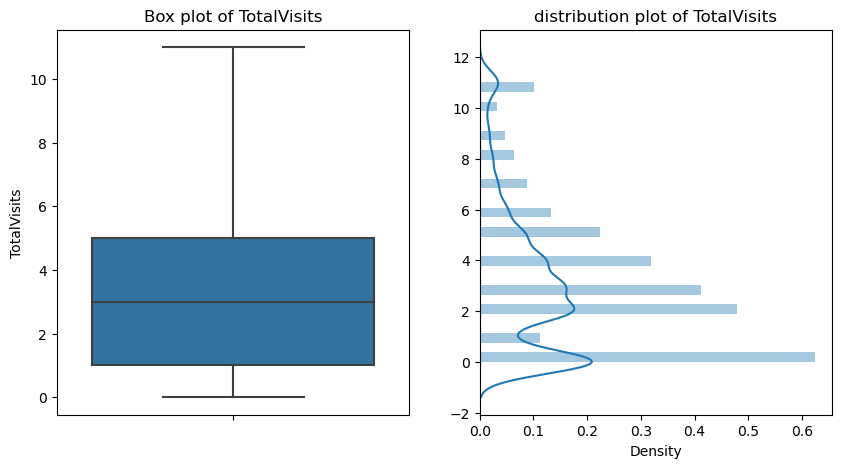

In [130]:
# plotting the box plot and distribution plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=leads['TotalVisits'])
plt.title("Box plot of TotalVisits")
plt.subplot(1,2,2)
sns.distplot(x=leads['TotalVisits'], vertical=True)
plt.title("distribution plot of TotalVisits")
plt.show()

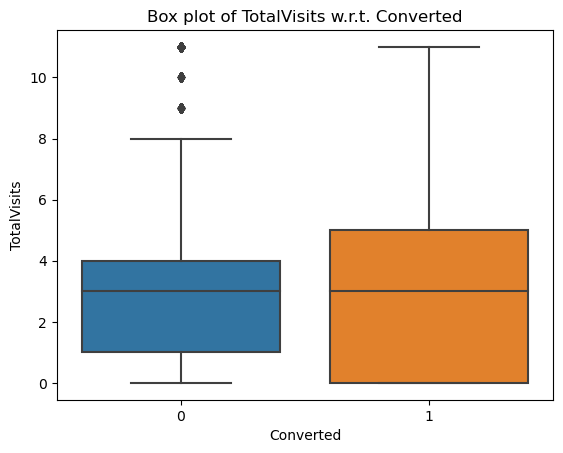

In [131]:
# Getting boxplot of totalvists vs converted 
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.title("Box plot of TotalVisits w.r.t. Converted")
plt.show()

<b>Inference </b><br>
1. Median for converted and not converted leads are the same


In [132]:
print(clm_num)

['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


#### 24. Handling "Total Time Spent on Website"

In [133]:
# getting null value
leads['Total Time Spent on Website'].isnull().sum()

0

In [134]:
#describing the column
leads['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

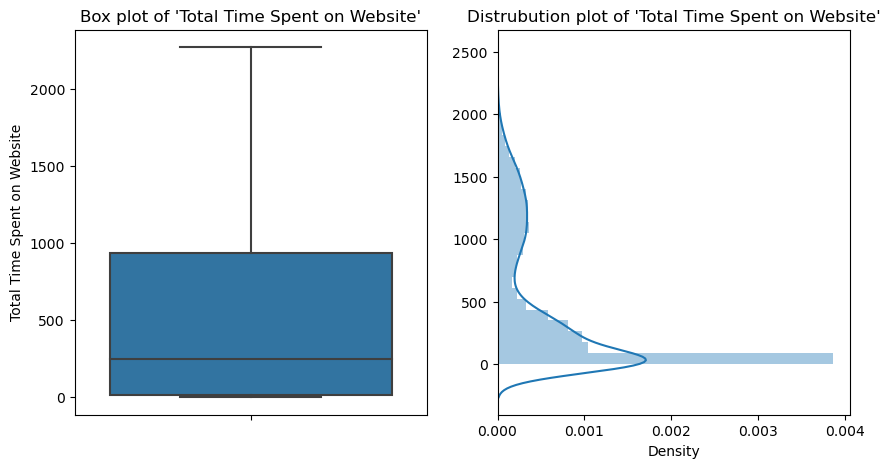

In [135]:
# plotting the box plot and distribution plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.title("Box plot of 'Total Time Spent on Website'")
plt.subplot(1,2,2)
plt.title("Distrubution plot of 'Total Time Spent on Website'")
sns.distplot(x=leads['Total Time Spent on Website'], vertical=True)
plt.show()

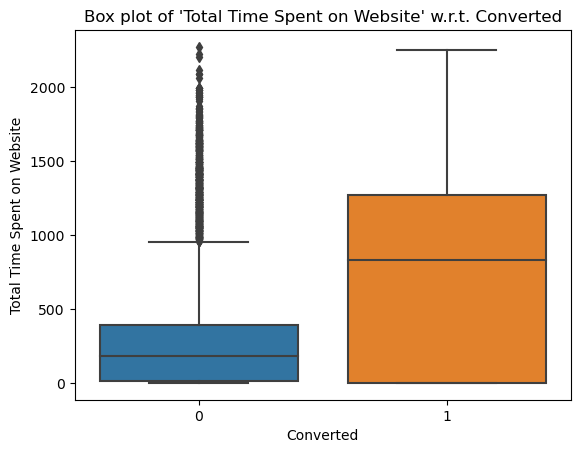

In [136]:
# Getting boxplot of 'Total Time Spent on Website' vs converted 
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.title("Box plot of 'Total Time Spent on Website' w.r.t. Converted")
plt.show()

<b>Inference </b><br>
1. leads who are spending more time will mostly to be converted.'



In [137]:
print(clm_num)

['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


#### 24. Handling "Page Views Per Visit"

In [138]:
# getting null value
leads['Page Views Per Visit'].isnull().sum()

137

In [139]:
#describing the column
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [140]:
# imputing the null value with the median i.e. 50 percentile which is  2

leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan , 2)

# getting null value
leads['Page Views Per Visit'].isnull().sum()

0

In [141]:
#describing the column
leads['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

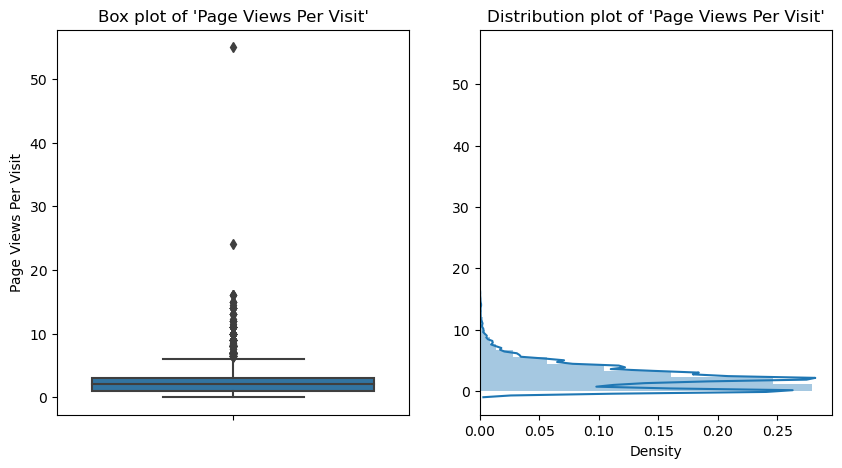

In [142]:
# plotting the box plot and distribution plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=leads['Page Views Per Visit'])
plt.title("Box plot of 'Page Views Per Visit'")
plt.subplot(1,2,2)
plt.title("Distribution plot of 'Page Views Per Visit'")
sns.distplot(x=leads['Page Views Per Visit'], vertical=True)
plt.show()

In [143]:
# finding IQR
Q3=leads['Page Views Per Visit'].quantile(0.75)
Q1= leads['Page Views Per Visit'].quantile(0.25)
IQR=Q3-Q1
print('Q3 =', Q3 )
print('Q1 =', Q1 )
print('IQR =', IQR )

Q3 = 3.0
Q1 = 1.0
IQR = 2.0


In [144]:
#finding threshold value of the data
threshold = Q3+1.5*IQR
threshold

6.0

In [145]:
# Finding number of Outliers observation
leads[leads['Page Views Per Visit']>threshold].shape

(360, 14)

In [146]:
threshold = Q3+1.5*IQR
threshold

6.0

In [147]:
# here we can impute 360 outliers with threshold value of the data i.e. 6
leads.loc[leads['Page Views Per Visit']>6, 'Page Views Per Visit']=6

In [148]:
#describing the column
leads['Page Views Per Visit'].describe()

count    9240.000000
mean        2.255105
std         1.779471
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64

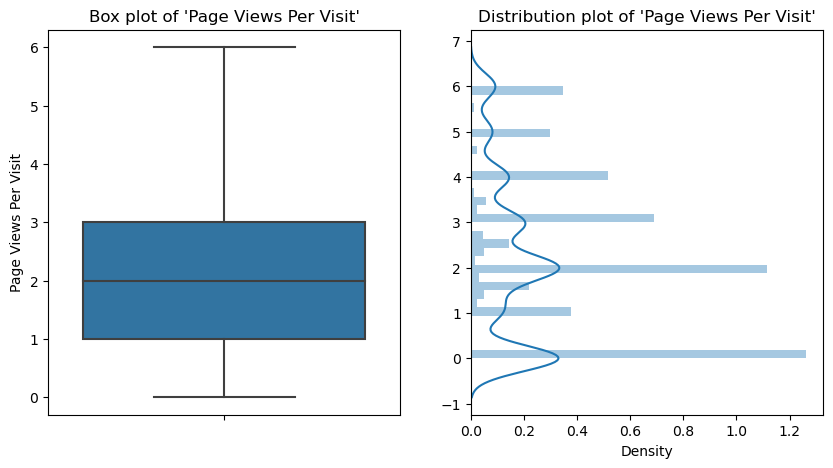

In [149]:
# plotting the box plot and distribution plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=leads['Page Views Per Visit'])
plt.title("Box plot of 'Page Views Per Visit'")
plt.subplot(1,2,2)
plt.title("Distribution plot of 'Page Views Per Visit'")
sns.distplot(x=leads['Page Views Per Visit'], vertical=True)
plt.show()

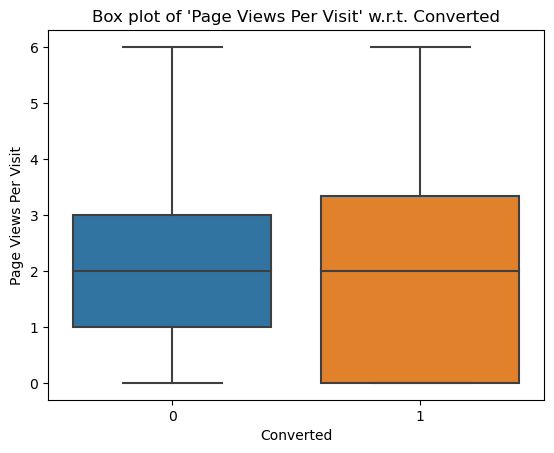

In [150]:
# Getting boxplot of totalvists vs converted 
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.title("Box plot of 'Page Views Per Visit' w.r.t. Converted")
plt.show()

<b>Inference </b><br>
1. Median for converted and not converted leads are the same


---

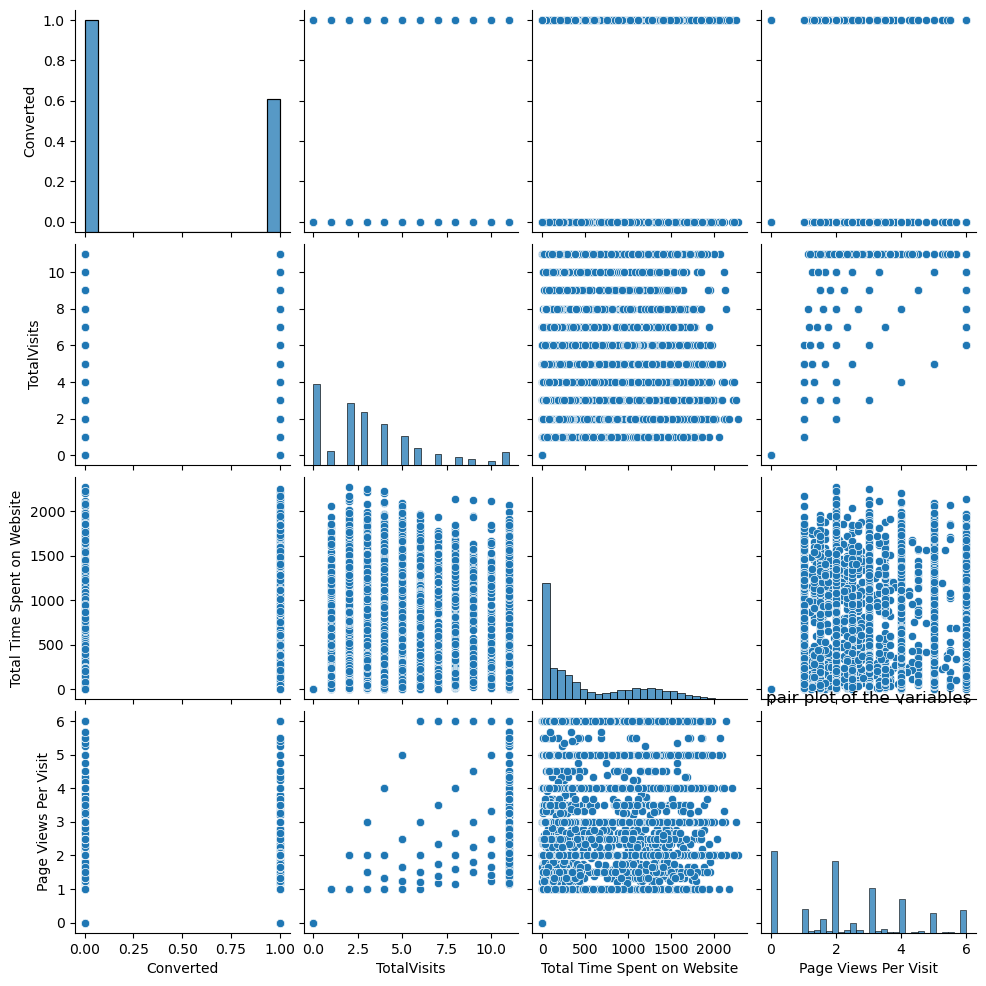

In [151]:
# visualizing numerical variable (pair plot) with target variable
sns.pairplot(leads[clm_num])
plt.title("pair plot of the variables")
plt.show()

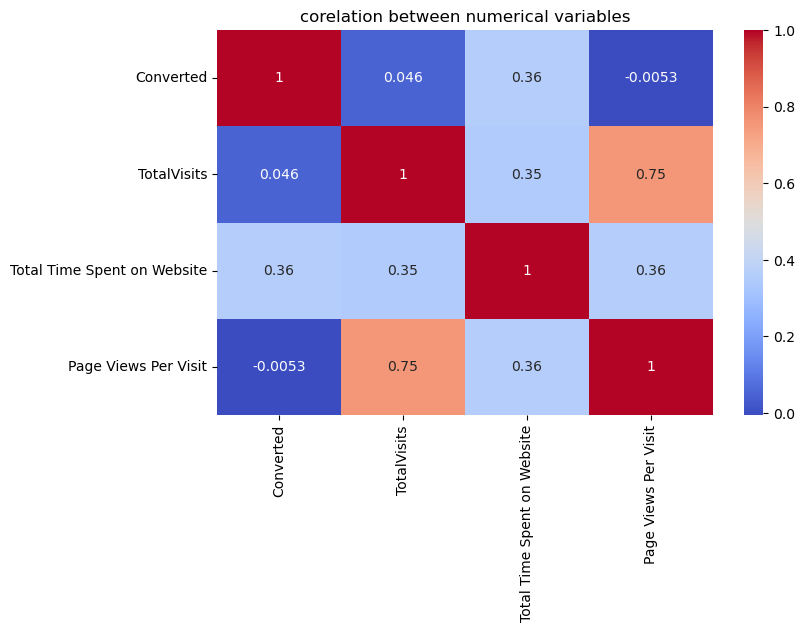

In [152]:
# visualizing numerical variable (heat map)
plt.figure(figsize = (8, 5))
sns.heatmap(leads[clm_num].corr(), annot=True, cmap='coolwarm')
plt.title("corelation between numerical variables")
plt.show()

---
## Data Preparation for model building

In [153]:
leads.head()   # overlooking the table 

Lead Origin     Lead Source Do Not Email  Converted  \
Lead Number                                                                    
660737                           API      Olark Chat           No          0   
660728                           API  Organic Search           No          0   
660727       Landing Page Submission  Direct Traffic           No          1   
660719       Landing Page Submission  Direct Traffic           No          0   
660681       Landing Page Submission          Google           No          1   

             TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                                   
660737               0.0                            0                   0.0   
660728               5.0                          674                   2.5   
660727               2.0                         1532                   2.0   
660719               1.0                          305                   1.0   
660681               2.0                         1428                   1.0   

                       Last Activity           Specialization  \
Lead Number                                                     
660737       Page Visited on Website            Not Specified   
660728                  Email Opened            Not Specified   
660727                  Email Opened  Business Administration   
660719                   Unreachable    Media and Advertising   
660681             Converted to Lead            Not Specified   

            What is your current occupation  \
Lead Number                                   
660737                           Unemployed   
660728                           Unemployed   
660727                              Student   
660719                           Unemployed   
660681                           Unemployed   

                                            Tags    City  \
Lead Number                                                
660737               Interested in other courses  Mumbai   
660728                                   Ringing  Mumbai   
660727       Will revert after reading the email  Mumbai   
660719                                   Ringing  Mumbai   
660681       Will revert after reading the email  Mumbai   

            A free copy of Mastering The Interview Last Notable Activity  
Lead Number                                                               
660737                                          No              Modified  
660728                                          No          Email Opened  
660727                                         Yes          Email Opened  
660719                                          No              Modified  
660681                                          No              Modified

In [154]:
leads.shape    # looking at the rows and colummn

(9240, 14)

In [155]:
leads.describe()      # describing the table

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.217424                   487.698268   
std       0.486714     2.860471                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000    11.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.255105  
std                1.779471  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max                6.000000

In [156]:
leads.info()     # getting info of the table

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null

In [157]:
# converting yes to 1 and no to 0

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads
leads[varlist] = leads[varlist].apply(binary_map)

In [158]:
leads.head()   # overlooking the table 

Lead Origin     Lead Source  Do Not Email  Converted  \
Lead Number                                                                     
660737                           API      Olark Chat             0          0   
660728                           API  Organic Search             0          0   
660727       Landing Page Submission  Direct Traffic             0          1   
660719       Landing Page Submission  Direct Traffic             0          0   
660681       Landing Page Submission          Google             0          1   

             TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                                   
660737               0.0                            0                   0.0   
660728               5.0                          674                   2.5   
660727               2.0                         1532                   2.0   
660719               1.0                          305                   1.0   
660681               2.0                         1428                   1.0   

                       Last Activity           Specialization  \
Lead Number                                                     
660737       Page Visited on Website            Not Specified   
660728                  Email Opened            Not Specified   
660727                  Email Opened  Business Administration   
660719                   Unreachable    Media and Advertising   
660681             Converted to Lead            Not Specified   

            What is your current occupation  \
Lead Number                                   
660737                           Unemployed   
660728                           Unemployed   
660727                              Student   
660719                           Unemployed   
660681                           Unemployed   

                                            Tags    City  \
Lead Number                                                
660737               Interested in other courses  Mumbai   
660728                                   Ringing  Mumbai   
660727       Will revert after reading the email  Mumbai   
660719                                   Ringing  Mumbai   
660681       Will revert after reading the email  Mumbai   

             A free copy of Mastering The Interview Last Notable Activity  
Lead Number                                                                
660737                                            0              Modified  
660728                                            0          Email Opened  
660727                                            1          Email Opened  
660719                                            0              Modified  
660681                                            0              Modified

In [159]:
leads.describe()      # describing the table

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9240.000000  9240.000000                  9240.000000   
mean       0.079437     0.385390     3.217424                   487.698268   
std        0.270435     0.486714     2.860471                   548.021466   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     1.000000                    12.000000   
50%        0.000000     0.000000     3.000000                   248.000000   
75%        0.000000     1.000000     5.000000                   936.000000   
max        1.000000     1.000000    11.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9240.000000                             9240.000000  
mean               2.255105                                0.312554  
std                1.779471                                0.463559  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
max                6.000000                                1.000000

In [160]:
# getting the list of column having object data type
cat_clm = list(i for i in leads.columns if leads[i].dtype==object)
print(cat_clm)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']


##### 1. Creating dummy variable for 'Lead Origin'

In [161]:
leads["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [162]:
# Creating dummy variables for the variable "Lead Origin"
LO = pd.get_dummies(leads["Lead Origin"], prefix="Lead Origin",dtype='int')

# Dropping 'Lead Origin_Quick Add Form' column
LO.drop(['Lead Origin_Quick Add Form'], axis=1, inplace=True)

#Adding the results to the leads dataframe
leads = pd.concat([leads,LO], axis=1)

# printing the rown and column of the data leads
leads.shape

(9240, 18)

In [163]:
print(cat_clm)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']


##### 2. Creating dummy variable for 'Lead Source'

In [164]:
leads["Lead Source"].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other                 23
Name: Lead Source, dtype: int64

In [165]:
# Creating dummy variables for the variable "Lead Source"
LS = pd.get_dummies(leads["Lead Source"], prefix="Lead Source",dtype='int')

# Dropping 'Lead Source_Other' column
LS.drop(['Lead Source_Other'], axis=1, inplace=True)

#Adding the results to the leads dataframe
leads = pd.concat([leads, LS], axis=1)

# printing the rown and column of the data leads
leads.shape

(9240, 26)

In [166]:
print(cat_clm)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']


##### 3. Creating dummy variable for 'Last Activity'

In [167]:
leads["Last Activity"].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Other                          51
Name: Last Activity, dtype: int64

In [168]:
# Creating dummy variables for the variable "Last Activity"
LA = pd.get_dummies(leads["Last Activity"], prefix="Last Activity",dtype='int')

# Dropping ‘Last Activity_Other’ column
LA.drop(['Last Activity_Other'], axis=1, inplace=True)

#Adding the results to the leads dataframe
leads = pd.concat([leads, LA], axis=1)

# printing the rown and column of the data leads
leads.shape

(9240, 36)

In [169]:
print(cat_clm)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']


##### 4. Creating dummy variable for 'Specialization'

In [170]:
leads["Specialization"].value_counts()

Management                           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [171]:
# Creating dummy variables for the variable "Specialization"
SP = pd.get_dummies(leads["Specialization"], prefix="Specialization",dtype='int')

# Dropping ‘Last Activity_Other’ column
SP.drop(['Specialization_Not Specified'], axis=1, inplace=True)

#Adding the results to the leads dataframe
leads = pd.concat([leads, SP], axis=1)

# printing the rown and column of the data leads
leads.shape

(9240, 46)

In [172]:
print(cat_clm)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']


##### 5. Creating dummy variable for 'What is your current occupation'

In [173]:
leads["What is your current occupation"].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [174]:
# Creating dummy variables for the variable "What is your current occupation"
CO = pd.get_dummies(leads["What is your current occupation"], prefix="Current Occupation",dtype='int')

# Dropping ‘Current Occupation_Other’ column
CO.drop(['Current Occupation_Other'], axis=1, inplace=True)

#Adding the results to the leads dataframe
leads = pd.concat([leads, CO], axis=1)

# printing the rown and column of the data leads
leads.shape

(9240, 51)

In [175]:
print(cat_clm)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']


##### 6. Creating dummy variable for 'Tags'

In [176]:
leads["Tags"].value_counts()

Not Specified                          3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Other                                   302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [177]:
# Creating dummy variables for the variable "Tags"
Tags = pd.get_dummies(leads["Tags"], prefix="Tags",dtype='int')

# Dropping ‘Tags_Not Specified’ column
Tags.drop(['Tags_Not Specified'], axis=1, inplace=True)

#Adding the results to the leads dataframe
leads = pd.concat([leads, Tags], axis=1)

# printing the rown and column of the data leads
leads.shape

(9240, 63)

In [178]:
print(cat_clm)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']


##### 7. Creating dummy variable for 'City'

In [179]:
leads["City"].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [180]:
# Creating dummy variables for the variable "City"
City = pd.get_dummies(leads["City"], prefix="City",dtype='int')

# Dropping ‘City_Other Cities’ column
City.drop(['City_Other Cities'], axis=1, inplace=True)

#Adding the results to the leads dataframe
leads = pd.concat([leads, City], axis=1)

# printing the rown and column of the data leads
leads.shape

(9240, 68)

In [181]:
print(cat_clm)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']


##### 8. Creating dummy variable for 'Last Notable Activity'

In [182]:
leads["Last Notable Activity"].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: Last Notable Activity, dtype: int64

In [183]:
# Creating dummy variables for the variable "Last Notable Activity"
LNA = pd.get_dummies(leads["Last Notable Activity"], prefix="Last Notable Activity",dtype='int')

# Dropping ‘Last Notable Activity_Other’ column
LNA.drop(['Last Notable Activity_Other'], axis=1, inplace=True)

#Adding the results to the leads dataframe
leads = pd.concat([leads, LNA], axis=1)

# printing the rown and column of the data leads
leads.shape

(9240, 74)

---

In [184]:
# dropping categorial column i.e. cat_clm
leads.drop(cat_clm, axis=1, inplace=True)

# printing the rown and column of the data leads
leads.shape 

(9240, 66)

In [185]:
leads.head()

Do Not Email  Converted  TotalVisits  \
Lead Number                                         
660737                  0          0          0.0   
660728                  0          0          5.0   
660727                  0          1          2.0   
660719                  0          0          1.0   
660681                  0          1          2.0   

             Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                      
660737                                 0                   0.0   
660728                               674                   2.5   
660727                              1532                   2.0   
660719                               305                   1.0   
660681                              1428                   1.0   

             A free copy of Mastering The Interview  Lead Origin_API  \
Lead Number                                                            
660737                                            0                1   
660728                                            0                1   
660727                                            1                0   
660719                                            0                0   
660681                                            0                0   

             Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
Lead Number                                                                   
660737                                         0                          0   
660728                                         0                          0   
660727                                         1                          0   
660719                                         1                          0   
660681                                         1                          0   

             Lead Origin_Lead Import  Lead Source_Direct Traffic  \
Lead Number                                                        
660737                             0                           0   
660728                             0                           0   
660727                             0                           1   
660719                             0                           1   
660681                             0                           0   

             Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                                                     
660737                          0                   0                       1   
660728                          0                   0                       0   
660727                          0                   0                       0   
660719                          0                   0                       0   
660681                          0                   1                       0   

             Lead Source_Organic Search  Lead Source_Reference  \
Lead Number                                                      
660737                                0                      0   
660728                                1                      0   
660727                                0                      0   
660719                                0                      0   
660681                                0                      0   

             Lead Source_Referral Sites  Lead Source_Welingak Website  \
Lead Number                                                             
660737                                0                             0   
660728                                0                             0   
660727                                0                             0   
660719                                0                             0   
660681                                0                             0   

             Last Activity_Converted to Lead  Last Activity_Email Bounced  \
Lead Number           

In [186]:
leads.info() # checking the datatype of leads

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 66 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9240 non-null   int64  
 1   Converted                                         9240 non-null   int64  
 2   TotalVisits                                       9240 non-null   float64
 3   Total Time Spent on Website                       9240 non-null   int64  
 4   Page Views Per Visit                              9240 non-null   float64
 5   A free copy of Mastering The Interview            9240 non-null   int64  
 6   Lead Origin_API                                   9240 non-null   int32  
 7   Lead Origin_Landing Page Submission               9240 non-null   int32  
 8   Lead Origin_Lead Add Form                         9240 non-null   int32  
 9   Lead Origin_

In [187]:
leads.describe()  # getting statistical information of the table

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9240.000000  9240.000000                  9240.000000   
mean       0.079437     0.385390     3.217424                   487.698268   
std        0.270435     0.486714     2.860471                   548.021466   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     1.000000                    12.000000   
50%        0.000000     0.000000     3.000000                   248.000000   
75%        0.000000     1.000000     5.000000                   936.000000   
max        1.000000     1.000000    11.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  \
count           9240.000000                             9240.000000   
mean               2.255105                                0.312554   
std                1.779471                                0.463559   
min                0.000000                                0.000000   
25%                1.000000                                0.000000   
50%                2.000000                                0.000000   
75%                3.000000                                1.000000   
max                6.000000                                1.000000   

       Lead Origin_API  Lead Origin_Landing Page Submission  \
count      9240.000000                          9240.000000   
mean          0.387446                             0.528788   
std           0.487193                             0.499198   
min           0.000000                             0.000000   
25%           0.000000                             0.000000   
50%           0.000000                             1.000000   
75%           1.000000                             1.000000   
max           1.000000                             1.000000   

       Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
count                9240.000000              9240.000000   
mean                    0.077706                 0.005952   
std                     0.267722                 0.076926   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 0.000000   
max                     1.000000                 1.000000   

       Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
count                 9240.000000           9240.000000         9240.000000   
mean                     0.275216              0.005952            0.314827   
std                      0.446647              0.076926            0.464472   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      1.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       Lead Source_Olark Chat  Lead Source_Organic Search  \
count             9240.000000                 9240.000000   
mean                 0.189935                    0.124892   
std                  0.392271                    0.330614   
min                  0.000000                    0.000000   
25%                  0.000000                    0.000000   
50%                  0.000000                    0.000000   
75%                  0.000000                    0.000000   
max                  1.000000                    1.000000   

       Lead Source_Reference  Lead Source_Referral Sites  \
count            9240.000000                 9240.000000   
mean                0.057792                    0.013528   
std                 0.233363                    0.115527   
min                 0.000000                

---
### Test-Train Split

In [188]:
# import the library for Test-Train Split
from sklearn.model_selection import train_test_split

In [189]:
# Splitting data into train and test

train, test = train_test_split(leads, train_size=0.7, random_state=18)

# printinf the shape of test and train data
print('shape of train data' , train.shape)
print('shape of test data' , test.shape)

shape of train data (6468, 66)
shape of test data (2772, 66)


### Scaling of train data

In [190]:
train.describe()

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   6468.000000  6468.000000  6468.000000                  6468.000000   
mean       0.079004     0.381416     3.212276                   479.477891   
std        0.269766     0.485772     2.878541                   544.918074   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     1.000000                     9.000000   
50%        0.000000     0.000000     3.000000                   241.000000   
75%        0.000000     1.000000     5.000000                   913.000000   
max        1.000000     1.000000    11.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  \
count           6468.000000                             6468.000000   
mean               2.247767                                0.311070   
std                1.786776                                0.462967   
min                0.000000                                0.000000   
25%                1.000000                                0.000000   
50%                2.000000                                0.000000   
75%                3.000000                                1.000000   
max                6.000000                                1.000000   

       Lead Origin_API  Lead Origin_Landing Page Submission  \
count      6468.000000                          6468.000000   
mean          0.394094                             0.522727   
std           0.488693                             0.499522   
min           0.000000                             0.000000   
25%           0.000000                             0.000000   
50%           0.000000                             1.000000   
75%           1.000000                             1.000000   
max           1.000000                             1.000000   

       Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
count                6468.000000              6468.000000   
mean                    0.077304                 0.005720   
std                     0.267093                 0.075423   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 0.000000   
max                     1.000000                 1.000000   

       Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
count                 6468.000000           6468.000000         6468.000000   
mean                     0.274428              0.005875            0.310142   
std                      0.446260              0.076429            0.462587   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      1.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       Lead Source_Olark Chat  Lead Source_Organic Search  \
count             6468.000000                 6468.000000   
mean                 0.193723                    0.126005   
std                  0.395245                    0.331881   
min                  0.000000                    0.000000   
25%                  0.000000                    0.000000   
50%                  0.000000                    0.000000   
75%                  0.000000                    0.000000   
max                  1.000000                    1.000000   

       Lead Source_Reference  Lead Source_Referral Sites  \
count            6468.000000                 6468.000000   
mean                0.058132                    0.014378   
std                 0.234012                    0.119054   
min                 0.000000                

In [191]:
# importing scaing library
from sklearn.preprocessing import StandardScaler

In [192]:
# column that to be scaled
to_Scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

scaler = StandardScaler() # assigning StandardScaler() to scaler

train[to_Scale] = scaler.fit_transform(train[to_Scale],2)  # scaling 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' column

train[to_Scale] =  round(train[to_Scale],4) # rounding the value to two decimal place

train.describe() # getting the statical information of the train data

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   6468.000000  6468.000000  6468.000000                  6468.000000   
mean       0.079004     0.381416     0.000015                    -0.000006   
std        0.269766     0.485772     1.000079                     1.000082   
min        0.000000     0.000000    -1.116000                    -0.880000   
25%        0.000000     0.000000    -0.768600                    -0.863500   
50%        0.000000     0.000000    -0.073700                    -0.437700   
75%        0.000000     1.000000     0.621100                     0.795600   
max        1.000000     1.000000     2.705700                     3.289800   

       Page Views Per Visit  A free copy of Mastering The Interview  \
count           6468.000000                             6468.000000   
mean              -0.000008                                0.311070   
std                1.000082                                0.462967   
min               -1.258100                                0.000000   
25%               -0.698400                                0.000000   
50%               -0.138700                                0.000000   
75%                0.421000                                1.000000   
max                2.100200                                1.000000   

       Lead Origin_API  Lead Origin_Landing Page Submission  \
count      6468.000000                          6468.000000   
mean          0.394094                             0.522727   
std           0.488693                             0.499522   
min           0.000000                             0.000000   
25%           0.000000                             0.000000   
50%           0.000000                             1.000000   
75%           1.000000                             1.000000   
max           1.000000                             1.000000   

       Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
count                6468.000000              6468.000000   
mean                    0.077304                 0.005720   
std                     0.267093                 0.075423   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 0.000000   
max                     1.000000                 1.000000   

       Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
count                 6468.000000           6468.000000         6468.000000   
mean                     0.274428              0.005875            0.310142   
std                      0.446260              0.076429            0.462587   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      1.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       Lead Source_Olark Chat  Lead Source_Organic Search  \
count             6468.000000                 6468.000000   
mean                 0.193723                    0.126005   
std                  0.395245                    0.331881   
min                  0.000000                    0.000000   
25%                  0.000000                    0.000000   
50%                  0.000000                    0.000000   
75%                  0.000000                    0.000000   
max                  1.000000                    1.000000   

       Lead Source_Reference  Lead Source_Referral Sites  \
count            6468.000000                 6468.000000   
mean                0.058132                    0.014378   
std                 0.234012                    0.119054   
min                 0.000000                

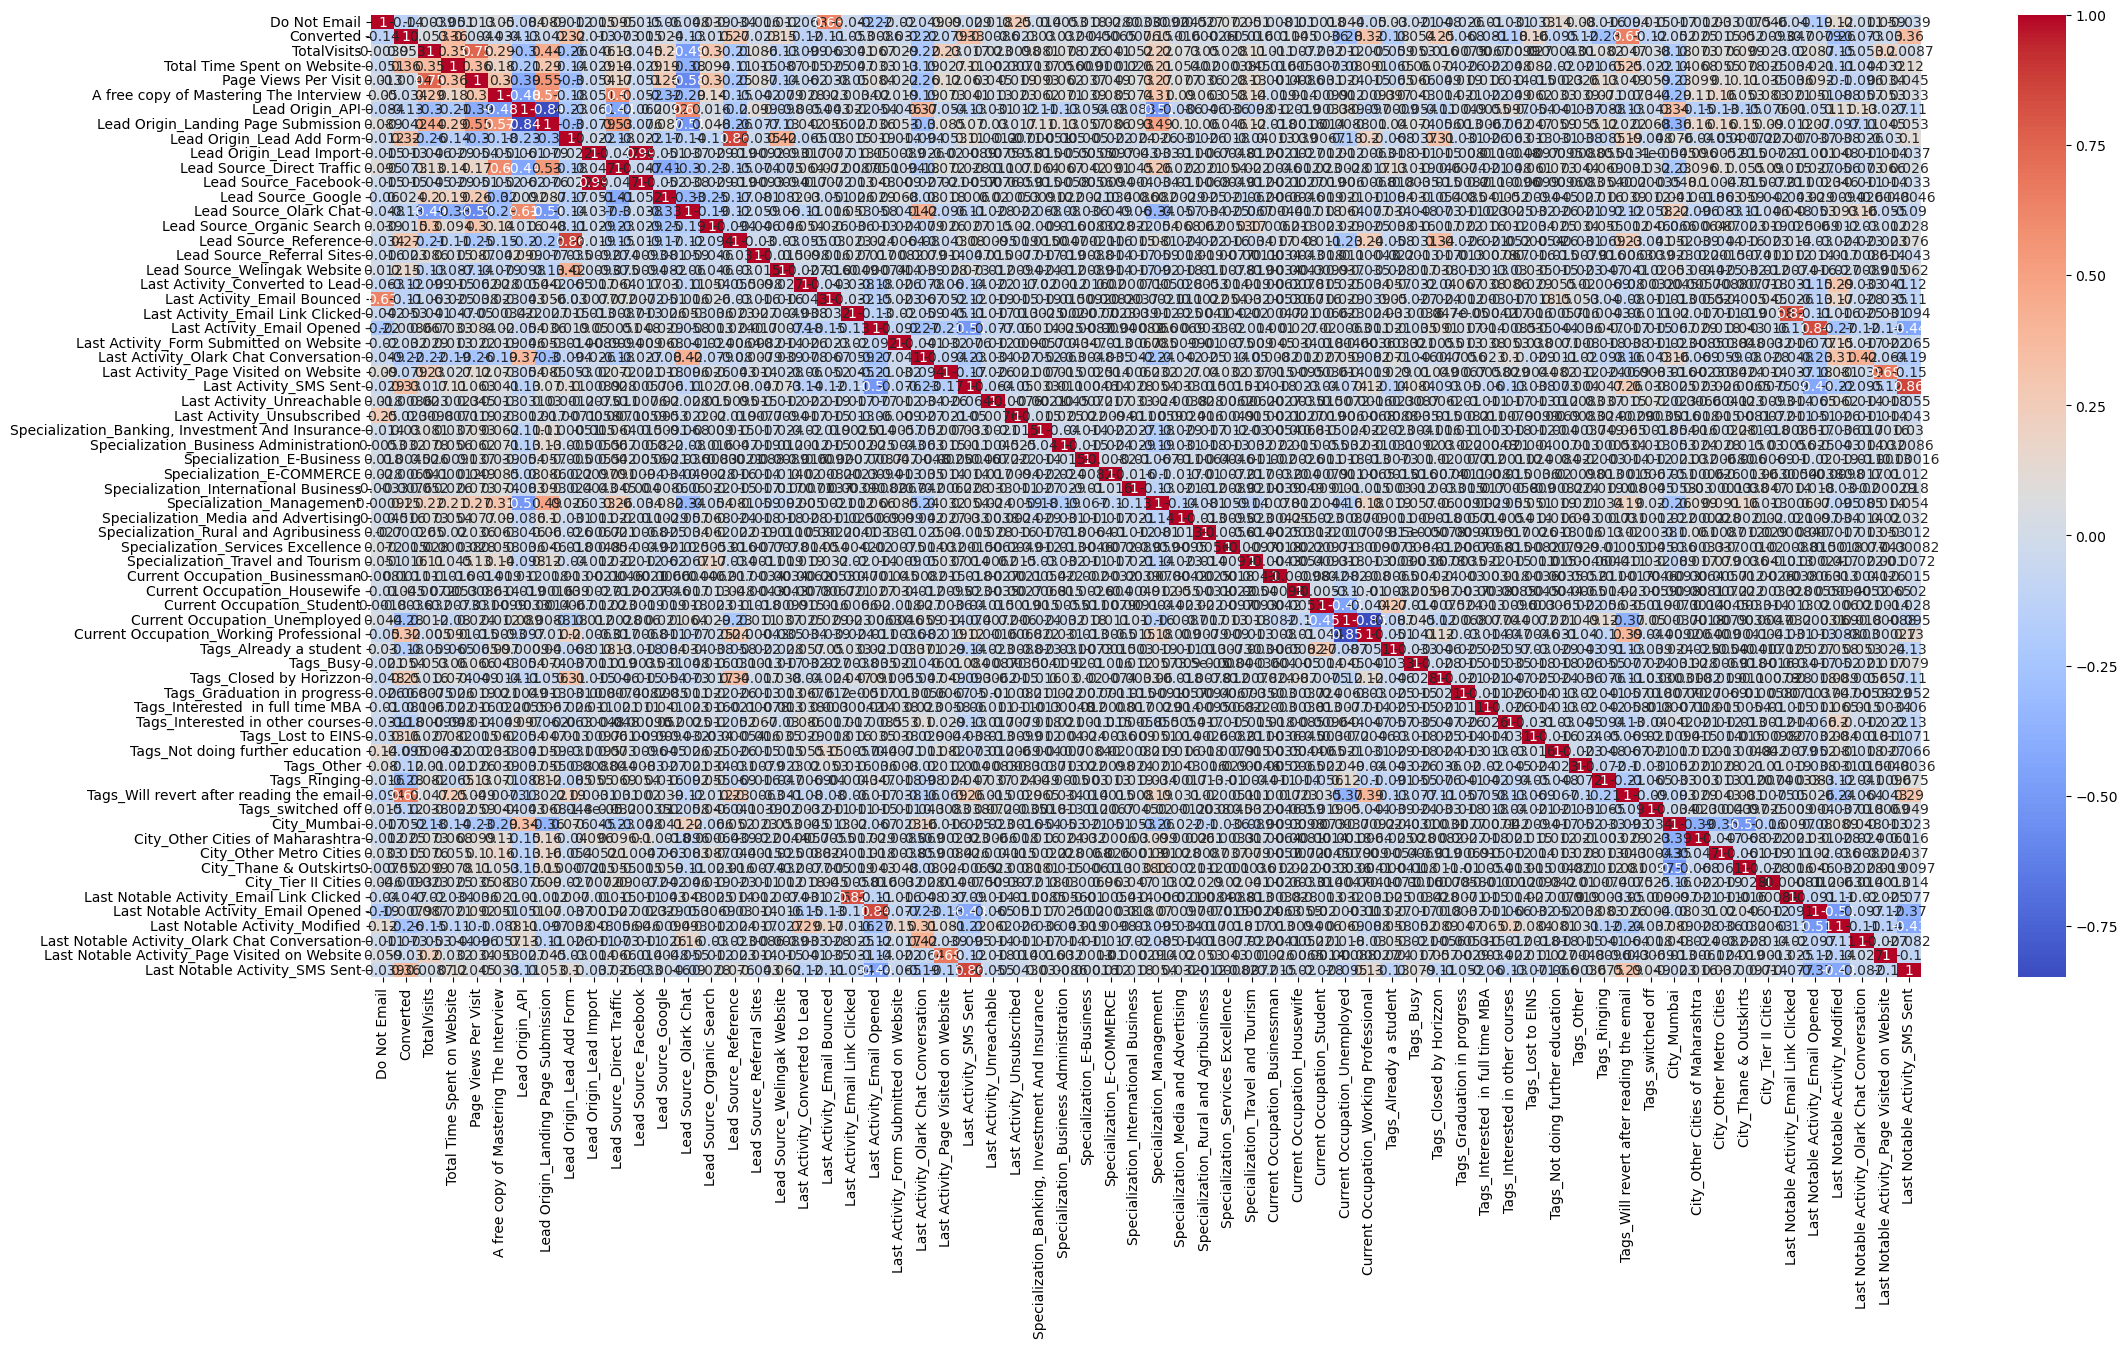

In [193]:
# Plot the co-relation graph to check the co-relation between train data variables
plt.figure(figsize = (25, 12.5))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.show()

<b>Inference </b><br>
1. Heat map shows there is multicollinearity between independent variable



In [194]:
# deviding the train data into Xtrain and ytrain based on target variable i.e. 'Converted', for the model building

Xtrain = train.drop(['Converted'], axis=1)
ytrain = train['Converted']

In [195]:
Xtrain.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
Lead Number                                                           
645342                  0      -0.0737                       0.1845   
616621                  0      -0.0737                       0.9957   
632407                  1       0.6211                      -0.4854   
618476                  0      -1.1160                      -0.8800   
592824                  0      -1.1160                      -0.8800   

             Page Views Per Visit  A free copy of Mastering The Interview  \
Lead Number                                                                 
645342                    -0.4185                                       1   
616621                     0.4210                                       0   
632407                     1.5405                                       0   
618476                    -1.2581                                       0   
592824                    -1.2581                                       0   

             Lead Origin_API  Lead Origin_Landing Page Submission  \
Lead Number                                                         
645342                     0                                    1   
616621                     0                                    1   
632407                     0                                    1   
618476                     1                                    0   
592824                     1                                    0   

             Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
Lead Number                                                       
645342                               0                        0   
616621                               0                        0   
632407                               0                        0   
618476                               0                        0   
592824                               0                        0   

             Lead Source_Direct Traffic  Lead Source_Facebook  \
Lead Number                                                     
645342                                1                     0   
616621                                0                     0   
632407                                1                     0   
618476                                0                     0   
592824                                0                     0   

             Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                               
645342                        0                       0   
616621                        1                       0   
632407                        0                       0   
618476                        0                       1   
592824                        0                       1   

             Lead Source_Organic Search  Lead Source_Reference  \
Lead Number                                                      
645342                                0                      0   
616621                                0                      0   
632407                                0                      0   
618476                                0                      0   
592824                                0                      0   

             Lead Source_Referral Sites  Lead Source_Welingak Website  \
Lead Number                                                             
645342                                0                             0   
616621                                0                             0   
632407                                0                             0   
618476                                0                             0   
592824                                0                             0   

             Last Activity_Converted to Lead  Last Activity_Email Bounced  \
Lead Number                                                                 
645342                

In [196]:
ytrain.head()

Lead Number
645342    0
616621    0
632407    0
618476    0
592824    0
Name: Converted, dtype: int64

---
## Model Building

#### Recursive feature elimination (RFE)

In [197]:
# importing library 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
LogReg = LogisticRegression() # assigning LogisticRegression()  to LogReg

In [198]:
# Running RFE with the output number of the variable equal to 20
rfe =RFE(LogReg,n_features_to_select=20)
rfe=rfe.fit(Xtrain, ytrain)   # fitting rfe to train data

In [199]:
print('The mask of selected feature:', '\n', rfe.support_,'\n')
print('feature ranking','\n', rfe.ranking_)

The mask of selected feature: 
 [ True False  True False False False False  True False False False False
  True False False False  True False False False False False False False
  True False False False False False False False False False False False
 False False False False False False  True False  True False  True  True
  True  True  True  True  True  True False False False False False  True
 False  True  True False  True] 

feature ranking 
 [ 1 23  1 24 21  6  5  1 36 26 17 27  1 28  2 25  1  9 38 37 45 31  4 14
  1 40 30 34 33 18 20 13 35 43 12 15  8 42 19 10 11 29  1  3  1  7  1  1
  1  1  1  1  1  1 39 41 46 44 16  1 32  1  1 22  1]


In [200]:
# display the feature having support
col_rfe_20 = Xtrain.columns[rfe.support_]
col_rfe_20

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Other',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

---

####  Building model using statsmodel, for the detailed statistics

In [201]:
# Creating Xtrain dataframe with RFE selected variables
Xtrain = Xtrain[col_rfe_20]
Xtrain.head()

Do Not Email  Total Time Spent on Website  \
Lead Number                                              
645342                  0                       0.1845   
616621                  0                       0.9957   
632407                  1                      -0.4854   
618476                  0                      -0.8800   
592824                  0                      -0.8800   

             Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
Lead Number                                                      
645342                               0                       0   
616621                               0                       0   
632407                               0                       0   
618476                               0                       1   
592824                               0                       1   

             Lead Source_Welingak Website  Last Activity_SMS Sent  \
Lead Number                                                         
645342                                  0                       0   
616621                                  0                       0   
632407                                  0                       0   
618476                                  0                       0   
592824                                  0                       0   

             Tags_Already a student  Tags_Closed by Horizzon  \
Lead Number                                                    
645342                            0                        0   
616621                            0                        0   
632407                            0                        0   
618476                            0                        0   
592824                            0                        0   

             Tags_Interested  in full time MBA  \
Lead Number                                      
645342                                       0   
616621                                       0   
632407                                       0   
618476                                       0   
592824                                       0   

             Tags_Interested in other courses  Tags_Lost to EINS  \
Lead Number                                                        
645342                                      0                  0   
616621                                      0                  0   
632407                                      0                  0   
618476                                      0                  0   
592824                                      0                  0   

             Tags_Not doing further education  Tags_Other  Tags_Ringing  \
Lead Number                                                               
645342                                      0           0             0   
616621                                      0           0             0   
632407                                      0           0             0   
618476                                      0           0             0   
592824                                      0           0             0   

             Tags_Will revert after reading the email  Tags_switched off  \
Lead Number                                                                
645342                                              0                  0   
616621                                              0                  0   
632407                                              0                  0   
618476                                              0                  0   
592824                                              0                  0   

             Last Notable Activity_Email Link Clicked  \
Lead Number                                             
645342                                              0   
616621                                              0   
632407                                              0   
618476                                

#### Logistic Regression Model 1

In [202]:
#Import statsmodels library
import statsmodels.api as sm

# Adding a constant variable 
Xtrain_c = sm.add_constant(Xtrain)
Xtrain_c.head()

const  Do Not Email  Total Time Spent on Website  \
Lead Number                                                     
645342         1.0             0                       0.1845   
616621         1.0             0                       0.9957   
632407         1.0             1                      -0.4854   
618476         1.0             0                      -0.8800   
592824         1.0             0                      -0.8800   

             Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
Lead Number                                                      
645342                               0                       0   
616621                               0                       0   
632407                               0                       0   
618476                               0                       1   
592824                               0                       1   

             Lead Source_Welingak Website  Last Activity_SMS Sent  \
Lead Number                                                         
645342                                  0                       0   
616621                                  0                       0   
632407                                  0                       0   
618476                                  0                       0   
592824                                  0                       0   

             Tags_Already a student  Tags_Closed by Horizzon  \
Lead Number                                                    
645342                            0                        0   
616621                            0                        0   
632407                            0                        0   
618476                            0                        0   
592824                            0                        0   

             Tags_Interested  in full time MBA  \
Lead Number                                      
645342                                       0   
616621                                       0   
632407                                       0   
618476                                       0   
592824                                       0   

             Tags_Interested in other courses  Tags_Lost to EINS  \
Lead Number                                                        
645342                                      0                  0   
616621                                      0                  0   
632407                                      0                  0   
618476                                      0                  0   
592824                                      0                  0   

             Tags_Not doing further education  Tags_Other  Tags_Ringing  \
Lead Number                                                               
645342                                      0           0             0   
616621                                      0           0             0   
632407                                      0           0             0   
618476                                      0           0             0   
592824                                      0           0             0   

             Tags_Will revert after reading the email  Tags_switched off  \
Lead Number                                                                
645342                                              0                  0   
616621                                              0                  0   
632407                                              0                  0   
618476                                              0                  0   
592824                                              0                  0   

             Last Notable Activity_Email Link Clicked  \
Lead Number                                             
645342                                              0   
616621                                              0   
632407                                        

In [203]:
# Running the logistic regression model
logR1 = sm.GLM(ytrain, Xtrain_c, family = sm.families.Binomial())

# fitting the model
logR_model_1 = logR1.fit()

In [204]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_1 = pd.DataFrame()
vif_1['Features'] = Xtrain.columns
vif_1['VIF']=[variance_inflation_factor(Xtrain.values,i) for i in range(Xtrain.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'],2)
vif_1 = vif_1.sort_values(by = 'VIF', ascending=False)

In [205]:
print(logR_model_1.summary(), '\n\n\n' , '-------xox-------xox-------xox-------xox-------xox', '\n')
print(vif_1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1277.9
Date:                Tue, 20 Feb 2024   Deviance:                       2555.8
Time:                        13:32:40   Pearson chi2:                 9.89e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6072
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

pvalue of all the feature is less than 0.05 <br>
"Last Notable Activity_SMS Sent" has high VIF i.e >5 so deleting column "Last Notable Activity_SMS Sent"


#### Logistic Regression Model 2

In [206]:
# dropping 'Last Notable Activity_SMS Sent' column
Xtrain = Xtrain.drop(['Last Notable Activity_SMS Sent'], axis=1)

# Adding a constant variable 
Xtrain_c = sm.add_constant(Xtrain)

# Running the logistic regression model
logR2 = sm.GLM(ytrain, Xtrain_c, family = sm.families.Binomial())

# fitting the model
logR_model_2 = logR2.fit()

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_2 = pd.DataFrame()
vif_2['Features'] = Xtrain.columns
vif_2['VIF']=[variance_inflation_factor(Xtrain.values,i) for i in range(Xtrain.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'],2)
vif_2 = vif_2.sort_values(by = 'VIF', ascending=False)

print(logR_model_2.summary(), '\n\n\n' , '-------xox-------xox-------xox-------xox-------xox', '\n')
print(vif_2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1282.7
Date:                Tue, 20 Feb 2024   Deviance:                       2565.4
Time:                        13:32:40   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6066
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

1. The logR_model_2 is looking good as VIF of every independend vriable is less than 5 which is the indication of low muticollinearity between the independend vriable
2. The p-values for all the independend vriable seems to be significant. (we considered alpha is 5%)

In [207]:
logR_model_2.params

const                                           -1.487691
Do Not Email                                    -1.074555
Total Time Spent on Website                      1.066900
Lead Origin_Lead Add Form                        1.728533
Lead Source_Olark Chat                           1.211611
Lead Source_Welingak Website                     4.003001
Last Activity_SMS Sent                           1.894066
Tags_Already a student                          -3.174547
Tags_Closed by Horizzon                          7.371499
Tags_Interested  in full time MBA               -2.207674
Tags_Interested in other courses                -1.766521
Tags_Lost to EINS                                6.181323
Tags_Not doing further education                -2.370789
Tags_Other                                      -1.814681
Tags_Ringing                                    -3.320342
Tags_Will revert after reading the email         4.353942
Tags_switched off                               -3.600343
Last Notable A

---

### Lead Score  between 0 to 100

In [208]:
# Getting the predicted values on the train set
ytrain_predict = logR_model_2.predict(Xtrain_c)

ytrain_predict[:10] # print the 1st value

Lead Number
645342    0.215709
616621    0.101112
632407    0.007848
618476    0.052215
592824    0.228826
620223    0.996128
610300    0.048591
649677    0.992710
629353    0.012374
611930    0.999137
dtype: float64

In [209]:
# getting Lead Score  value between 0 to 100
Lead_Score = round(ytrain_predict*100,2)
Lead_Score[:10]

Lead Number
645342    21.57
616621    10.11
632407     0.78
618476     5.22
592824    22.88
620223    99.61
610300     4.86
649677    99.27
629353     1.24
611930    99.91
dtype: float64

In [210]:
# Creating a dataframe with the Converted and the lead score
ytrain_LeadScore = pd.DataFrame({'Converted': ytrain.values, 'Lead Score':Lead_Score})

# Printing ytrain_LeadScore table
ytrain_LeadScore.head()

Converted  Lead Score
Lead Number                       
645342               0       21.57
616621               0       10.11
632407               0        0.78
618476               0        5.22
592824               0       22.88

### checking confision matrix with lead score cutoff = 50

In [211]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
ytrain_LeadScore['predicted'] = ytrain_LeadScore['Lead Score'].map(lambda x : 1 if x > 50 else 0)
ytrain_LeadScore.head(10)

Converted  Lead Score  predicted
Lead Number                                  
645342               0       21.57          0
616621               0       10.11          0
632407               0        0.78          0
618476               0        5.22          0
592824               0       22.88          0
620223               1       99.61          1
610300               0        4.86          0
649677               1       99.27          1
629353               1        1.24          0
611930               1       99.91          1

### Confusion matrix 

In [212]:
# Import library for confusion matrix
from sklearn import metrics

In [213]:
# Confusion matrix 
confusion = metrics.confusion_matrix(ytrain_LeadScore.Converted, ytrain_LeadScore.predicted )
print(confusion)

[[3818  183]
 [ 300 2167]]


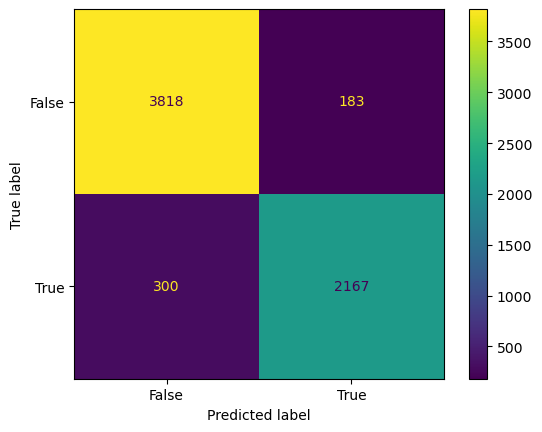

In [214]:
# visulize confusion matrix for lead score cut off 50
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])
cm_display.plot()
plt.show()

In [215]:
# printing Accuracy, Recall, Precision
print("Accuracy =", metrics.accuracy_score(ytrain_LeadScore.Converted, ytrain_LeadScore.predicted))
print("Recall =", metrics.recall_score(ytrain_LeadScore.Converted, ytrain_LeadScore.predicted))
print("Precision =", metrics.precision_score(ytrain_LeadScore.Converted, ytrain_LeadScore.predicted))

Accuracy = 0.9253246753246753
Recall = 0.8783948115119579
Precision = 0.9221276595744681


#### calculating sensitivity and specificity 

In [216]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [217]:
# sensitivity
sensitivity = TP / (TP+FN)
sensitivity

0.8783948115119579

In [218]:
# specificity
specificity = TN / (TN+FP)
specificity

0.9542614346413396

## Finding Optimal Cutoff Point

In [219]:
# create columns with different lead score cutoffs 
score = [x for x in range(0,100,10)]
for i  in score:
    ytrain_LeadScore[i] = ytrain_LeadScore['Lead Score'].map(lambda x: 1 if x > i else 0)
ytrain_LeadScore.head()  

Converted  Lead Score  predicted  0  10  20  30  40  50  60  70  \
Lead Number                                                                    
645342               0       21.57          0  1   1   1   0   0   0   0   0   
616621               0       10.11          0  1   1   0   0   0   0   0   0   
632407               0        0.78          0  1   0   0   0   0   0   0   0   
618476               0        5.22          0  1   0   0   0   0   0   0   0   
592824               0       22.88          0  1   1   1   0   0   0   0   0   

             80  90  
Lead Number          
645342        0   0  
616621        0   0  
632407        0   0  
618476        0   0  
592824        0   0

In [220]:
# Calculate accuracy sensitivity and specificity for various lead score cutoffs.
cutoff_df = pd.DataFrame(columns= ['Lead Score','Accuracy','Sensitivity','Specificity'])
score = [x for x in range(0,100,10)]

# TP = cm[1,1] # true positive 
# TN = cm[0,0] # true negatives
# FP = cm[0,1] # false positives
# FN = cm[1,0] # false negatives

for i in score:
    cm = metrics.confusion_matrix(ytrain_LeadScore.Converted, ytrain_LeadScore[i] )
    accuracy = (cm[0,0]+cm[1,1])/(cm[1,1]+cm[0,0]+cm[0,1]+cm[1,0])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

    Lead Score  Accuracy  Sensitivity  Specificity
0          0.0  0.381416     1.000000     0.000000
10        10.0  0.832096     0.968788     0.747813
20        20.0  0.899969     0.949737     0.869283
30        30.0  0.923933     0.915687     0.929018
40        40.0  0.924397     0.899473     0.939765
50        50.0  0.925325     0.878395     0.954261
60        60.0  0.925634     0.854884     0.969258
70        70.0  0.913575     0.807864     0.978755
80        80.0  0.903680     0.775436     0.982754
90        90.0  0.883117     0.709364     0.990252


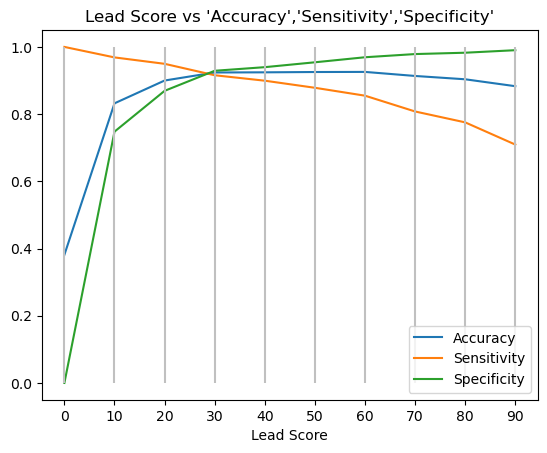

In [221]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Lead Score', y=['Accuracy','Sensitivity','Specificity'])
plt.xticks(cutoff_df['Lead Score'])
plt.vlines(x = [cutoff_df['Lead Score']], ymin = 0, ymax = max([0, 1]), colors = 'silver')
plt.title("Lead Score vs 'Accuracy','Sensitivity','Specificity'")
plt.show()

###### From the curve above, 30 is the optimum point to take as a cutoff of lead score.

In [222]:
ytrain_LeadScore['final_predicted'] = ytrain_LeadScore['Lead Score'].map( lambda x: 1 if x > 30 else 0)

ytrain_LeadScore.head(10)

Converted  Lead Score  predicted  0  10  20  30  40  50  60  70  \
Lead Number                                                                    
645342               0       21.57          0  1   1   1   0   0   0   0   0   
616621               0       10.11          0  1   1   0   0   0   0   0   0   
632407               0        0.78          0  1   0   0   0   0   0   0   0   
618476               0        5.22          0  1   0   0   0   0   0   0   0   
592824               0       22.88          0  1   1   1   0   0   0   0   0   
620223               1       99.61          1  1   1   1   1   1   1   1   1   
610300               0        4.86          0  1   0   0   0   0   0   0   0   
649677               1       99.27          1  1   1   1   1   1   1   1   1   
629353               1        1.24          0  1   0   0   0   0   0   0   0   
611930               1       99.91          1  1   1   1   1   1   1   1   1   

             80  90  final_predicted  
Lead Number                           
645342        0   0                0  
616621        0   0                0  
632407        0   0                0  
618476        0   0                0  
592824        0   0                0  
620223        1   1                1  
610300        0   0                0  
649677        1   1                1  
629353        0   0                0  
611930        1   1                1

Final confusion matrix 
 [[3717  284]
 [ 208 2259]] 




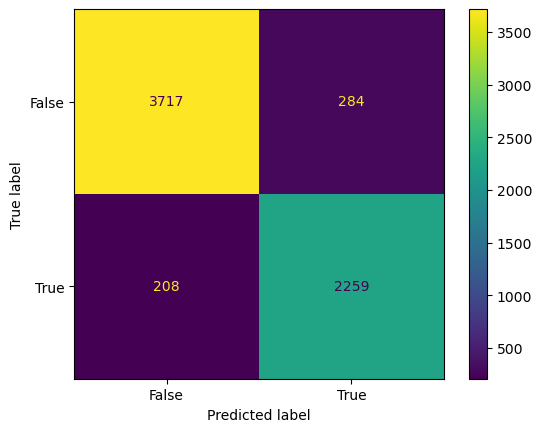

In [223]:
# printing confusion matrix
cm_final = metrics.confusion_matrix(ytrain_LeadScore.Converted, ytrain_LeadScore.final_predicted )
print("Final confusion matrix \n", cm_final, "\n\n")

# visualizing confusion matrix
metrics.ConfusionMatrixDisplay(confusion_matrix = cm_final, display_labels = [False, True]).plot()
plt.show()

In [224]:
# printing Accuracy, Recall, Precision
Acc = metrics.accuracy_score(ytrain_LeadScore.Converted, ytrain_LeadScore.final_predicted)
Rec = metrics.recall_score(ytrain_LeadScore.Converted, ytrain_LeadScore.final_predicted)
Preci = metrics.precision_score(ytrain_LeadScore.Converted, ytrain_LeadScore.final_predicted)
speci = cm_final[0,0]/(cm_final[0,0]+cm_final[0,1])
sensi = cm_final[1,1]/(cm_final[1,0]+cm_final[1,1])    # sensitivity = TP / (TP+FN)


Acc = (round(Acc*100,2))
Rec = (round(Rec*100,2))
Preci = (round(Preci*100,2))
speci = (round(speci*100,2))
sensi = (round(sensi*100,2))

print("Accuracy    = {}%".format(Acc))
print("Sensitivity = {}%".format(sensi))
print("Specificity = {}%".format(speci))
print("Recall      = {}%".format(Rec))
print("Precision   = {}%".format(Preci))


Accuracy    = 92.39%
Sensitivity = 91.57%
Specificity = 92.9%
Recall      = 91.57%
Precision   = 88.83%


### Plotting the ROC Curve

In [225]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [226]:
fpr, tpr, thresholds = metrics.roc_curve( ytrain_LeadScore.Converted, ytrain_LeadScore['Lead Score'], drop_intermediate = False )

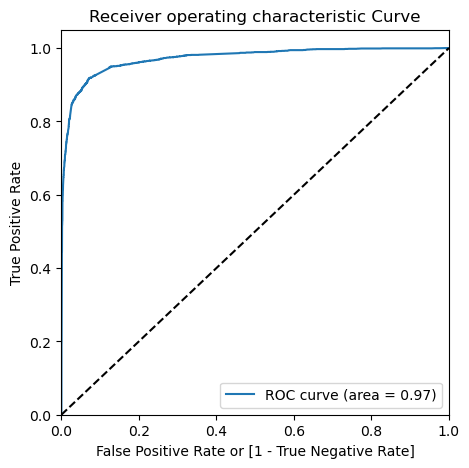

In [227]:
draw_roc( ytrain_LeadScore.Converted, ytrain_LeadScore['Lead Score'])

<b>Inference </b><br>
1. The area Under ROC curve should be close to 1 for 100% predictive model
2. We are getting area under ROC curve = 0.97 which is close to 1 this indicating a good predictive model.

### visualizing Precision and recall tradeoff for train data set

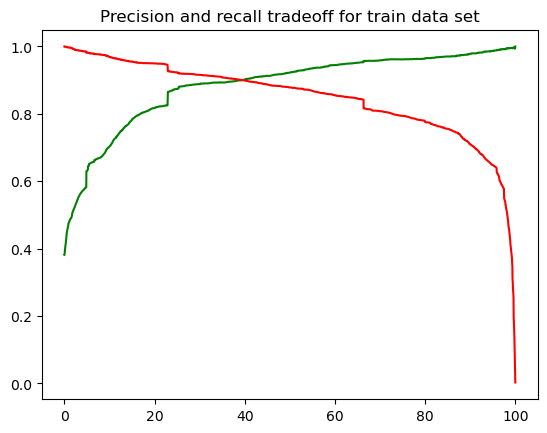

In [228]:
# Importing library
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(ytrain_LeadScore.Converted, ytrain_LeadScore['Lead Score'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision and recall tradeoff for train data set')
plt.show()

---
# Making predictions on the test set


In [229]:
test.head()

Do Not Email  Converted  TotalVisits  \
Lead Number                                         
612578                  0          1          4.0   
655260                  1          0          2.0   
651930                  0          0          0.0   
598761                  0          0          4.0   
608809                  0          0          6.0   

             Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                      
612578                               804                  1.33   
655260                               183                  2.00   
651930                                 0                  0.00   
598761                               113                  4.00   
608809                               379                  2.00   

             A free copy of Mastering The Interview  Lead Origin_API  \
Lead Number                                                            
612578                                            0                1   
655260                                            1                0   
651930                                            0                0   
598761                                            0                0   
608809                                            1                0   

             Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
Lead Number                                                                   
612578                                         0                          0   
655260                                         1                          0   
651930                                         0                          1   
598761                                         1                          0   
608809                                         1                          0   

             Lead Origin_Lead Import  Lead Source_Direct Traffic  \
Lead Number                                                        
612578                             0                           0   
655260                             0                           1   
651930                             0                           0   
598761                             0                           0   
608809                             0                           1   

             Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                                                     
612578                          0                   0                       0   
655260                          0                   0                       0   
651930                          0                   0                       0   
598761                          0                   1                       0   
608809                          0                   0                       0   

             Lead Source_Organic Search  Lead Source_Reference  \
Lead Number                                                      
612578                                1                      0   
655260                                0                      0   
651930                                0                      1   
598761                                0                      0   
608809                                0                      0   

             Lead Source_Referral Sites  Lead Source_Welingak Website  \
Lead Number                                                             
612578                                0                             0   
655260                                0                             0   
651930                                0                             0   
598761                                0                             0   
608809                                0                             0   

             Last Activity_Converted to Lead  Last Activity_Email Bounced  \
Lead Number           

In [230]:
# Scaling of test data
to_Scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Fit on on test data using transform()
test[to_Scale] = scaler.transform(test[to_Scale])  # scaling 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' column

test[to_Scale] =  round(test[to_Scale],4) # rounding the value to two decimal place

test.describe() # getting the statical information of the train data

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   2772.000000  2772.000000  2772.000000                  2772.000000   
mean       0.080447     0.394661     0.005977                     0.050283   
std        0.272034     0.488866     0.979162                     1.018256   
min        0.000000     0.000000    -1.116000                    -0.880000   
25%        0.000000     0.000000    -0.768600                    -0.841400   
50%        0.000000     0.000000    -0.073700                    -0.391800   
75%        0.000000     1.000000     0.621100                     0.907175   
max        1.000000     1.000000     2.705700                     3.254900   

       Page Views Per Visit  A free copy of Mastering The Interview  \
count           2772.000000                             2772.000000   
mean               0.013681                                0.316017   
std                0.986499                                0.465004   
min               -1.258100                                0.000000   
25%               -0.698400                                0.000000   
50%               -0.138700                                0.000000   
75%                0.605700                                1.000000   
max                2.100200                                1.000000   

       Lead Origin_API  Lead Origin_Landing Page Submission  \
count      2772.000000                          2772.000000   
mean          0.371934                             0.542929   
std           0.483408                             0.498244   
min           0.000000                             0.000000   
25%           0.000000                             0.000000   
50%           0.000000                             1.000000   
75%           1.000000                             1.000000   
max           1.000000                             1.000000   

       Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
count                2772.000000              2772.000000   
mean                    0.078644                 0.006494   
std                     0.269230                 0.080335   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 0.000000   
max                     1.000000                 1.000000   

       Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
count                 2772.000000           2772.000000         2772.000000   
mean                     0.277056              0.006133            0.325758   
std                      0.447625              0.078085            0.468742   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      1.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       Lead Source_Olark Chat  Lead Source_Organic Search  \
count             2772.000000                 2772.000000   
mean                 0.181097                    0.122294   
std                  0.385168                    0.327685   
min                  0.000000                    0.000000   
25%                  0.000000                    0.000000   
50%                  0.000000                    0.000000   
75%                  0.000000                    0.000000   
max                  1.000000                    1.000000   

       Lead Source_Reference  Lead Source_Referral Sites  \
count            2772.000000                 2772.000000   
mean                0.056999                    0.011544   
std                 0.231882                    0.106840   
min                 0.000000                

##### dividing the test data into Xtest and ytest  based on target variable i.e. 'Converted', for the model building

In [231]:
ytest = test['Converted']
ytest.head()

Lead Number
612578    1
655260    0
651930    0
598761    0
608809    0
Name: Converted, dtype: int64

In [232]:
Xtest = test[Xtrain.columns] #column based on logR_model_2 mpdel
Xtest.head()

Do Not Email  Total Time Spent on Website  \
Lead Number                                              
612578                  0                       0.5956   
655260                  1                      -0.5441   
651930                  0                      -0.8800   
598761                  0                      -0.6726   
608809                  0                      -0.1844   

             Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
Lead Number                                                      
612578                               0                       0   
655260                               0                       0   
651930                               1                       0   
598761                               0                       0   
608809                               0                       0   

             Lead Source_Welingak Website  Last Activity_SMS Sent  \
Lead Number                                                         
612578                                  0                       1   
655260                                  0                       1   
651930                                  0                       0   
598761                                  0                       0   
608809                                  0                       1   

             Tags_Already a student  Tags_Closed by Horizzon  \
Lead Number                                                    
612578                            0                        0   
655260                            1                        0   
651930                            0                        0   
598761                            0                        0   
608809                            0                        0   

             Tags_Interested  in full time MBA  \
Lead Number                                      
612578                                       0   
655260                                       0   
651930                                       0   
598761                                       0   
608809                                       0   

             Tags_Interested in other courses  Tags_Lost to EINS  \
Lead Number                                                        
612578                                      0                  0   
655260                                      0                  0   
651930                                      1                  0   
598761                                      0                  0   
608809                                      0                  0   

             Tags_Not doing further education  Tags_Other  Tags_Ringing  \
Lead Number                                                               
612578                                      0           0             0   
655260                                      0           0             0   
651930                                      0           0             0   
598761                                      0           0             1   
608809                                      0           1             0   

             Tags_Will revert after reading the email  Tags_switched off  \
Lead Number                                                                
612578                                              1                  0   
655260                                              0                  0   
651930                                              0                  0   
598761                                              0                  0   
608809                                              0                  0   

             Last Notable Activity_Email Link Clicked  \
Lead Number                                             
612578                                              0   
655260                                              0   
651930                                              0   
598761                                

In [233]:
# adding Comstant to test independend variable
Xtest_c = sm.add_constant(Xtest)
Xtest_c.head()

const  Do Not Email  Total Time Spent on Website  \
Lead Number                                                     
612578         1.0             0                       0.5956   
655260         1.0             1                      -0.5441   
651930         1.0             0                      -0.8800   
598761         1.0             0                      -0.6726   
608809         1.0             0                      -0.1844   

             Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
Lead Number                                                      
612578                               0                       0   
655260                               0                       0   
651930                               1                       0   
598761                               0                       0   
608809                               0                       0   

             Lead Source_Welingak Website  Last Activity_SMS Sent  \
Lead Number                                                         
612578                                  0                       1   
655260                                  0                       1   
651930                                  0                       0   
598761                                  0                       0   
608809                                  0                       1   

             Tags_Already a student  Tags_Closed by Horizzon  \
Lead Number                                                    
612578                            0                        0   
655260                            1                        0   
651930                            0                        0   
598761                            0                        0   
608809                            0                        0   

             Tags_Interested  in full time MBA  \
Lead Number                                      
612578                                       0   
655260                                       0   
651930                                       0   
598761                                       0   
608809                                       0   

             Tags_Interested in other courses  Tags_Lost to EINS  \
Lead Number                                                        
612578                                      0                  0   
655260                                      0                  0   
651930                                      1                  0   
598761                                      0                  0   
608809                                      0                  0   

             Tags_Not doing further education  Tags_Other  Tags_Ringing  \
Lead Number                                                               
612578                                      0           0             0   
655260                                      0           0             0   
651930                                      0           0             0   
598761                                      0           0             1   
608809                                      0           1             0   

             Tags_Will revert after reading the email  Tags_switched off  \
Lead Number                                                                
612578                                              1                  0   
655260                                              0                  0   
651930                                              0                  0   
598761                                              0                  0   
608809                                              0                  0   

             Last Notable Activity_Email Link Clicked  \
Lead Number                                             
612578                                              0   
655260                                              0   
651930                                        

In [234]:
Xtest_c.shape

(2772, 20)

In [235]:
# Making predictions using the model

ytest_pred = logR_model_2.predict(Xtest_c)
ytest_pred.head()

Lead Number
612578    0.995485
655260    0.002060
651930    0.014427
598761    0.003968
608809    0.167278
dtype: float64

In [236]:
# Creating a dataframe with the Converted and the lead score
ytest_LeadScore = pd.DataFrame({'Converted': ytest.values, 'Lead Score':ytest_pred*100})

# Printing ytrain_LeadScore table
ytest_LeadScore.head()

Converted  Lead Score
Lead Number                       
612578               1   99.548472
655260               0    0.206044
651930               0    1.442733
598761               0    0.396755
608809               0   16.727808

In [237]:
ytest_LeadScore.shape

(2772, 2)

In [238]:
# Creating new column 'final_predicted' with 1 if Churn_Prob > 30 else 0
ytest_LeadScore['final_predicted'] = ytest_LeadScore['Lead Score'].map(lambda x : 1 if x > 30 else 0)
ytest_LeadScore.head(10)

Converted  Lead Score  final_predicted
Lead Number                                        
612578               1   99.548472                1
655260               0    0.206044                0
651930               0    1.442733                0
598761               0    0.396755                0
608809               0   16.727808                0
588844               1   99.555467                1
641826               0    0.351553                0
585868               0    0.622454                0
633175               0    3.809065                0
638121               1   95.433236                1

In [239]:
# Confusion matrix 
confusion_test = metrics.confusion_matrix(ytest_LeadScore.Converted, ytest_LeadScore.final_predicted )
print(confusion_test)

[[1552  126]
 [  81 1013]]


In [240]:
# printing Accuracy, Recall, Precision
Acc_test = metrics.accuracy_score(ytest_LeadScore.Converted, ytest_LeadScore.final_predicted)
Rec_test = metrics.recall_score(ytest_LeadScore.Converted, ytest_LeadScore.final_predicted)
Preci_test = metrics.precision_score(ytest_LeadScore.Converted, ytest_LeadScore.final_predicted)
speci_test = confusion_test[0,0]/(confusion_test[0,0]+confusion_test[0,1])
sensi_test = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])    # sensitivity = TP / (TP+FN)

Acc_test = (round(Acc_test*100,2))
Rec_test = (round(Rec_test*100,2))
Preci_test = (round(Preci_test*100,2))
speci_test = (round(speci_test*100,2))
sensi_test = (round(sensi_test*100,2))

print("Accuracy    = {}%".format(Acc_test))
print("Sensitivity = {}%".format(sensi_test))
print("Specificity = {}%".format(speci_test))
print("Recall      = {}%".format(Rec_test))
print("Precision   = {}%".format(Preci_test))

Accuracy    = 92.53%
Sensitivity = 92.6%
Specificity = 92.49%
Recall      = 92.6%
Precision   = 88.94%


### visualizing Precision and recall tradeoff for test data set

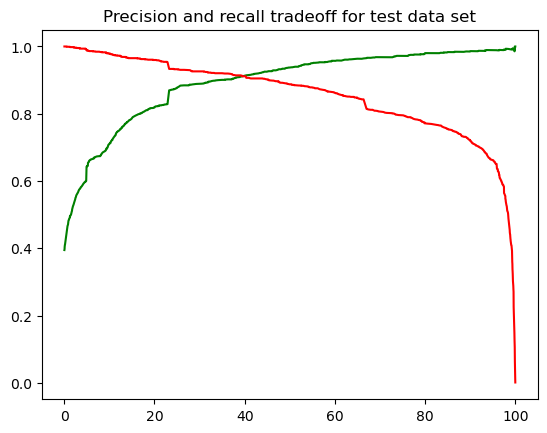

In [241]:
p, r, thresholds = precision_recall_curve(ytest_LeadScore.Converted, ytest_LeadScore['Lead Score'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision and recall tradeoff for test data set')
plt.show()

### compare the Test and train data on the 'Accuracy', 'Sensitivity', 'specificity', 'Recall' , 'Precision'

In [242]:
index = {"":['Accuracy', 'Sensitivity', 'specificity', 'Recall' , 'Precision']}   # index 
train_pred_val = { "Train Data Predition" : [Acc, sensi, speci, Rec, Preci] }
test_pred_val = { "Test Data Predition" : [Acc_test, sensi_test, speci_test, Rec_test, Preci_test] }

In [243]:
compare_table = pd.DataFrame({"":['Accuracy', 'Sensitivity', 'specificity', 'Recall' , 'Precision'],
                              "Train Data Prediction" : [Acc, sensi, speci, Rec, Preci],
                              "Test Data Prediction" : [Acc_test, sensi_test, speci_test, Rec_test, Preci_test]})
compare_table.set_index("")  # setting index

Train Data Prediction  Test Data Prediction
                                                        
Accuracy                     92.39                 92.53
Sensitivity                  91.57                 92.60
specificity                  92.90                 92.49
Recall                       91.57                 92.60
Precision                    88.83                 88.94

---
---
<b>Comments </b><br>
1. we have achieved our goal of the accuracy >80%
2. Based of the above model our lead conversion rate is 92.39% accurate
---
---


# Company Questions

#### 1. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

In [244]:
logR_model_2.params

const                                           -1.487691
Do Not Email                                    -1.074555
Total Time Spent on Website                      1.066900
Lead Origin_Lead Add Form                        1.728533
Lead Source_Olark Chat                           1.211611
Lead Source_Welingak Website                     4.003001
Last Activity_SMS Sent                           1.894066
Tags_Already a student                          -3.174547
Tags_Closed by Horizzon                          7.371499
Tags_Interested  in full time MBA               -2.207674
Tags_Interested in other courses                -1.766521
Tags_Lost to EINS                                6.181323
Tags_Not doing further education                -2.370789
Tags_Other                                      -1.814681
Tags_Ringing                                    -3.320342
Tags_Will revert after reading the email         4.353942
Tags_switched off                               -3.600343
Last Notable A

In [245]:
# Lead Source 
# Last Activity 
# Lead Origin


####  2.	What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

In [246]:
logR_model_2.params.sort_values(ascending=False)

Tags_Closed by Horizzon                          7.371499
Tags_Lost to EINS                                6.181323
Tags_Will revert after reading the email         4.353942
Lead Source_Welingak Website                     4.003001
Last Activity_SMS Sent                           1.894066
Lead Origin_Lead Add Form                        1.728533
Lead Source_Olark Chat                           1.211611
Total Time Spent on Website                      1.066900
Do Not Email                                    -1.074555
const                                           -1.487691
Last Notable Activity_Email Link Clicked        -1.641315
Last Notable Activity_Olark Chat Conversation   -1.683811
Last Notable Activity_Modified                  -1.759547
Tags_Interested in other courses                -1.766521
Tags_Other                                      -1.814681
Tags_Interested  in full time MBA               -2.207674
Tags_Not doing further education                -2.370789
Tags_Already a